In [ ]:
!python3 --version

Python 3.10.11


In [ ]:
# !pip install neupy
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold, LeaveOneOut
from sklearn.metrics import r2_score

In [ ]:
from neupy import algorithms

In [ ]:
# %pip install tqdm
# %pip install tensorflow

In [ ]:
# from collections.abc import MutableMapping
# from neupy import algorithms
from neupy.layers import *
from neupy import utils, init
# from neupy.exceptions import StopTraining

In [ ]:
from numpy.linalg import norm
from tqdm import tqdm
import gc
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

In [ ]:
names = ['REGION-CENTROID-COL','REGION-CENTROID-ROW','REGION-PIXEL-COUNT','SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN',
         'VEDGE-SD','HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN','RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN',
         'EXGREEN-MEAN','VALUE-MEAN','SATURATION-MEAN','HUE-MEAN']

data = pd.read_csv('segmentation.data')

data['class'] = data.index

data.set_index([list(range(1, len(data) + 1))], inplace=True)

names_c = ['REGION-CENTROID-COL','REGION-CENTROID-ROW','REGION-PIXEL-COUNT','SHORT-LINE-DENSITY-5','SHORT-LINE-DENSITY-2','VEDGE-MEAN',
           'VEDGE-SD','HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN','RAWGREEN-MEAN','EXRED-MEAN','EXBLUE-MEAN',
           'EXGREEN-MEAN','VALUE-MEAN','SATURATION-MEAN','HUE-MEAN', 'class']
_data      = data.to_numpy()

data_x = data[names]
data

REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
1                  140.0                125.0                   9   
2                  188.0                133.0                   9   
3                  105.0                139.0                   9   
4                   34.0                137.0                   9   
5                   39.0                111.0                   9   
..                   ...                  ...                 ...   
206                 36.0                243.0                   9   
207                186.0                218.0                   9   
208                197.0                236.0                   9   
209                208.0                240.0                   9   
210                223.0                185.0                   9   

     SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
1                0.000000                   0.0    0.277778  0.062963   
2                0.000000                   0.0    0.333333  0.266667   
3                0.000000                   0.0    0.277778  0.107407   
4                0.000000                   0.0    0.500000  0.166667   
5                0.000000                   0.0    0.722222  0.374074   
..                    ...                   ...         ...       ...   
206              0.111111                   0.0    1.888889  1.851851   
207              0.000000                   0.0    1.166667  0.744444   
208              0.000000                   0.0    2.444444  6.829628   
209              0.111111                   0.0    1.055556  0.862963   
210              0.000000                   0.0    0.500000  0.349603   

     HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
1      0.666667  0.311111        6.185185     7.333334      7.666666   
2      0.500000  0.077778        6.666666     8.333334      7.777778   
3      0.833333  0.522222        6.111111     7.555555      7.222222   
4      1.111111  0.474074        5.851852     7.777778      6.444445   
5      0.888889  0.429629        6.037037     7.000000      7.666666   
..          ...       ...             ...          ...           ...   
206    2.000000  0.711110       13.333333     9.888889     12.111111   
207    1.166667  0.655555       13.703704    10.666667     12.666667   
208    3.333333  7.599998       16.074074    13.111111     16.666668   
209    2.444444  5.007407       14.148149    10.888889     13.000000   
210    2.388889  2.080776       12.962963    11.555555      9.777778   

     RAWGREEN-MEAN  EXRED-MEAN  EXBLUE-MEAN  EXGREEN-MEAN  VALUE-MEAN  \
1         3.555556    3.444444     4.444445     -7.888889    7.777778   
2         3.888889    5.000000     3.333333     -8.333333    8.444445   
3         3.555556    4.333334     3.333333     -7.666666    7.555555   
4         3.333333    5.777778     1.777778     -7.555555    7.777778   
5         3.444444    2.888889     4.888889     -7.777778    7.888889   
..             ...         ...          ...           ...         ...   
206      18.000000  -10.333333    -3.666667     14.000000   18.000000   
207      17.777779   -9.111111    -3.111111     12.222222   17.777779   
208      18.444445   -8.888889     1.777778      7.111111   18.555555   
209      18.555555   -9.777778    -3.444444     13.222222   18.555555   
210      17.555555   -4.222222    -9.555555     13.777778   17.555555   

     SATURATION-MEAN  HUE-MEAN      class  
1           0.545635 -1.121818  BRICKFACE  
2           0.538580 -0.924817  BRICKFACE  
3           0.532628 -0.965946  BRICKFACE  
4           0.573633 -0.744272  BRICKFACE  
5           0.562919 -1.175773  BRICKFACE  
..               ...       ...        ...  
206         0.452229  2.368311      GRASS  
207         0.401347  2.382684      GRASS  
208         0.292729  2.789800      GRASS  
209         0.421621  2.392487      GRASS  
210         0.445418  1.838850      GRASS  

[210 rows x 20 columns]

In [ ]:
data.describe()

REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
count           210.000000           210.000000               210.0   
mean            124.647619           122.757143                 9.0   
std              74.104024            58.139686                 0.0   
min               1.000000            11.000000                 9.0   
25%              60.500000            81.500000                 9.0   
50%             123.500000           121.500000                 9.0   
75%             189.750000           174.500000                 9.0   
max             252.000000           250.000000                 9.0   

       SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN    VEDGE-SD  \
count            210.000000            210.000000  210.000000  210.000000   
mean               0.008466              0.006349    1.925132    5.719529   
std                0.029549              0.030077    3.158211   43.495942   
min                0.000000              0.000000    0.000000    0.000000   
25%                0.000000              0.000000    0.666667    0.400921   
50%                0.000000              0.000000    1.222222    0.828695   
75%                0.000000              0.000000    1.888890    1.676634   
max                0.111111              0.222222   25.500000  572.996400   

       HEDGE-MEAN     HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
count  210.000000   210.000000      210.000000   210.000000    210.000000   
mean     2.604233    11.638377       37.091005    32.967725     44.011112   
std      4.798268    97.390023       38.677168    35.540563     43.804447   
min      0.000000     0.000000        0.000000     0.000000      0.000000   
25%      0.777779     0.410816        6.453704     7.000000      8.277778   
50%      1.388889     0.913176       21.314816    18.611112     26.833334   
75%      2.597221     1.980485       52.629629    46.750000     64.194447   
max     44.722225  1386.329200      143.444440   136.888890    150.888890   

       RAWGREEN-MEAN  EXRED-MEAN  EXBLUE-MEAN  EXGREEN-MEAN  VALUE-MEAN  \
count     210.000000  210.000000   210.000000    210.000000  210.000000   
mean       34.294180  -12.369841    20.760317     -8.390476   44.888360   
std        37.057003   11.559599    18.761842     11.003746   43.235182   
min         0.000000  -48.222220    -9.666667    -30.555555    0.000000   
25%         3.805555  -18.111110     4.111111    -15.750000   10.527778   
50%        20.000000  -10.333333    19.555556     -9.888889   28.388890   
75%        46.472223   -4.666666    34.333332     -3.722222   64.194447   
max       142.555560    5.777778    78.777780     21.888890  150.888890   

       SATURATION-MEAN    HUE-MEAN  
count       210.000000  210.000000  
mean          0.423230   -1.340397  
std           0.227333    1.559405  
min           0.000000   -2.530950  
25%           0.275722   -2.187112  
50%           0.365455   -2.044163  
75%           0.539738   -1.429800  
max           1.000000    2.864931

In [ ]:
data.isna().any()

REGION-CENTROID-COL     False
REGION-CENTROID-ROW     False
REGION-PIXEL-COUNT      False
SHORT-LINE-DENSITY-5    False
SHORT-LINE-DENSITY-2    False
VEDGE-MEAN              False
VEDGE-SD                False
HEDGE-MEAN              False
HEDGE-SD                False
INTENSITY-MEAN          False
RAWRED-MEAN             False
RAWBLUE-MEAN            False
RAWGREEN-MEAN           False
EXRED-MEAN              False
EXBLUE-MEAN             False
EXGREEN-MEAN            False
VALUE-MEAN              False
SATURATION-MEAN         False
HUE-MEAN                False
class                   False
dtype: bool

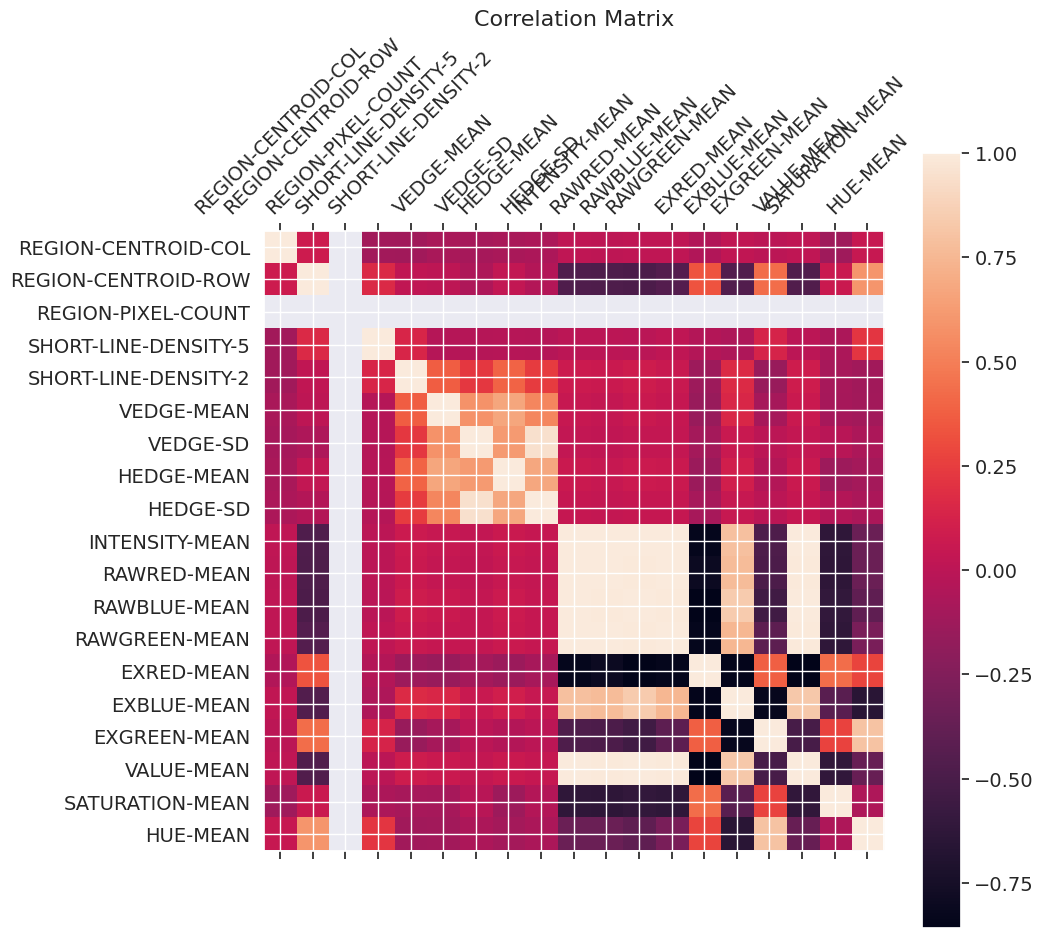

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

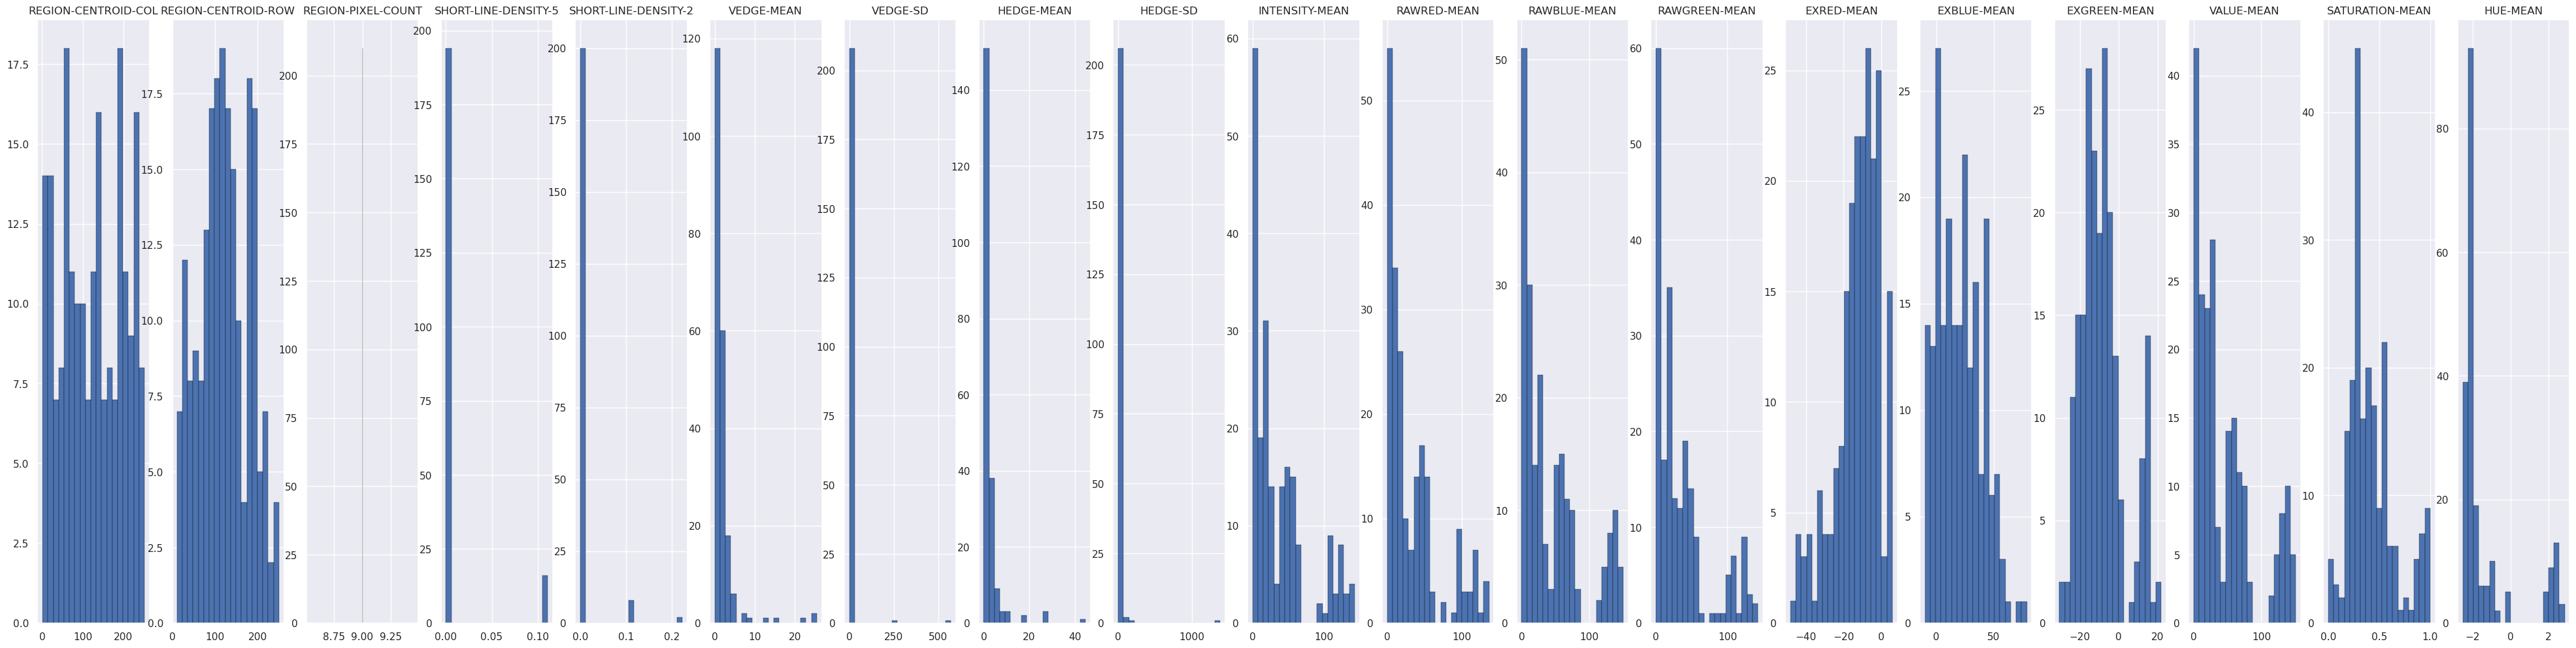

In [ ]:
fig, ax = plt.subplots(1, 19)
fig.set_size_inches((50, 12))

for i in range(19):
    x = data_x[names[i]].to_numpy().astype(np.float)
    ax[i].hist(x, bins=np.linspace(min(x), max(x), 20), lw=0.25, edgecolor='black')
    ax[i].title.set_text(names[i])

plt.show()

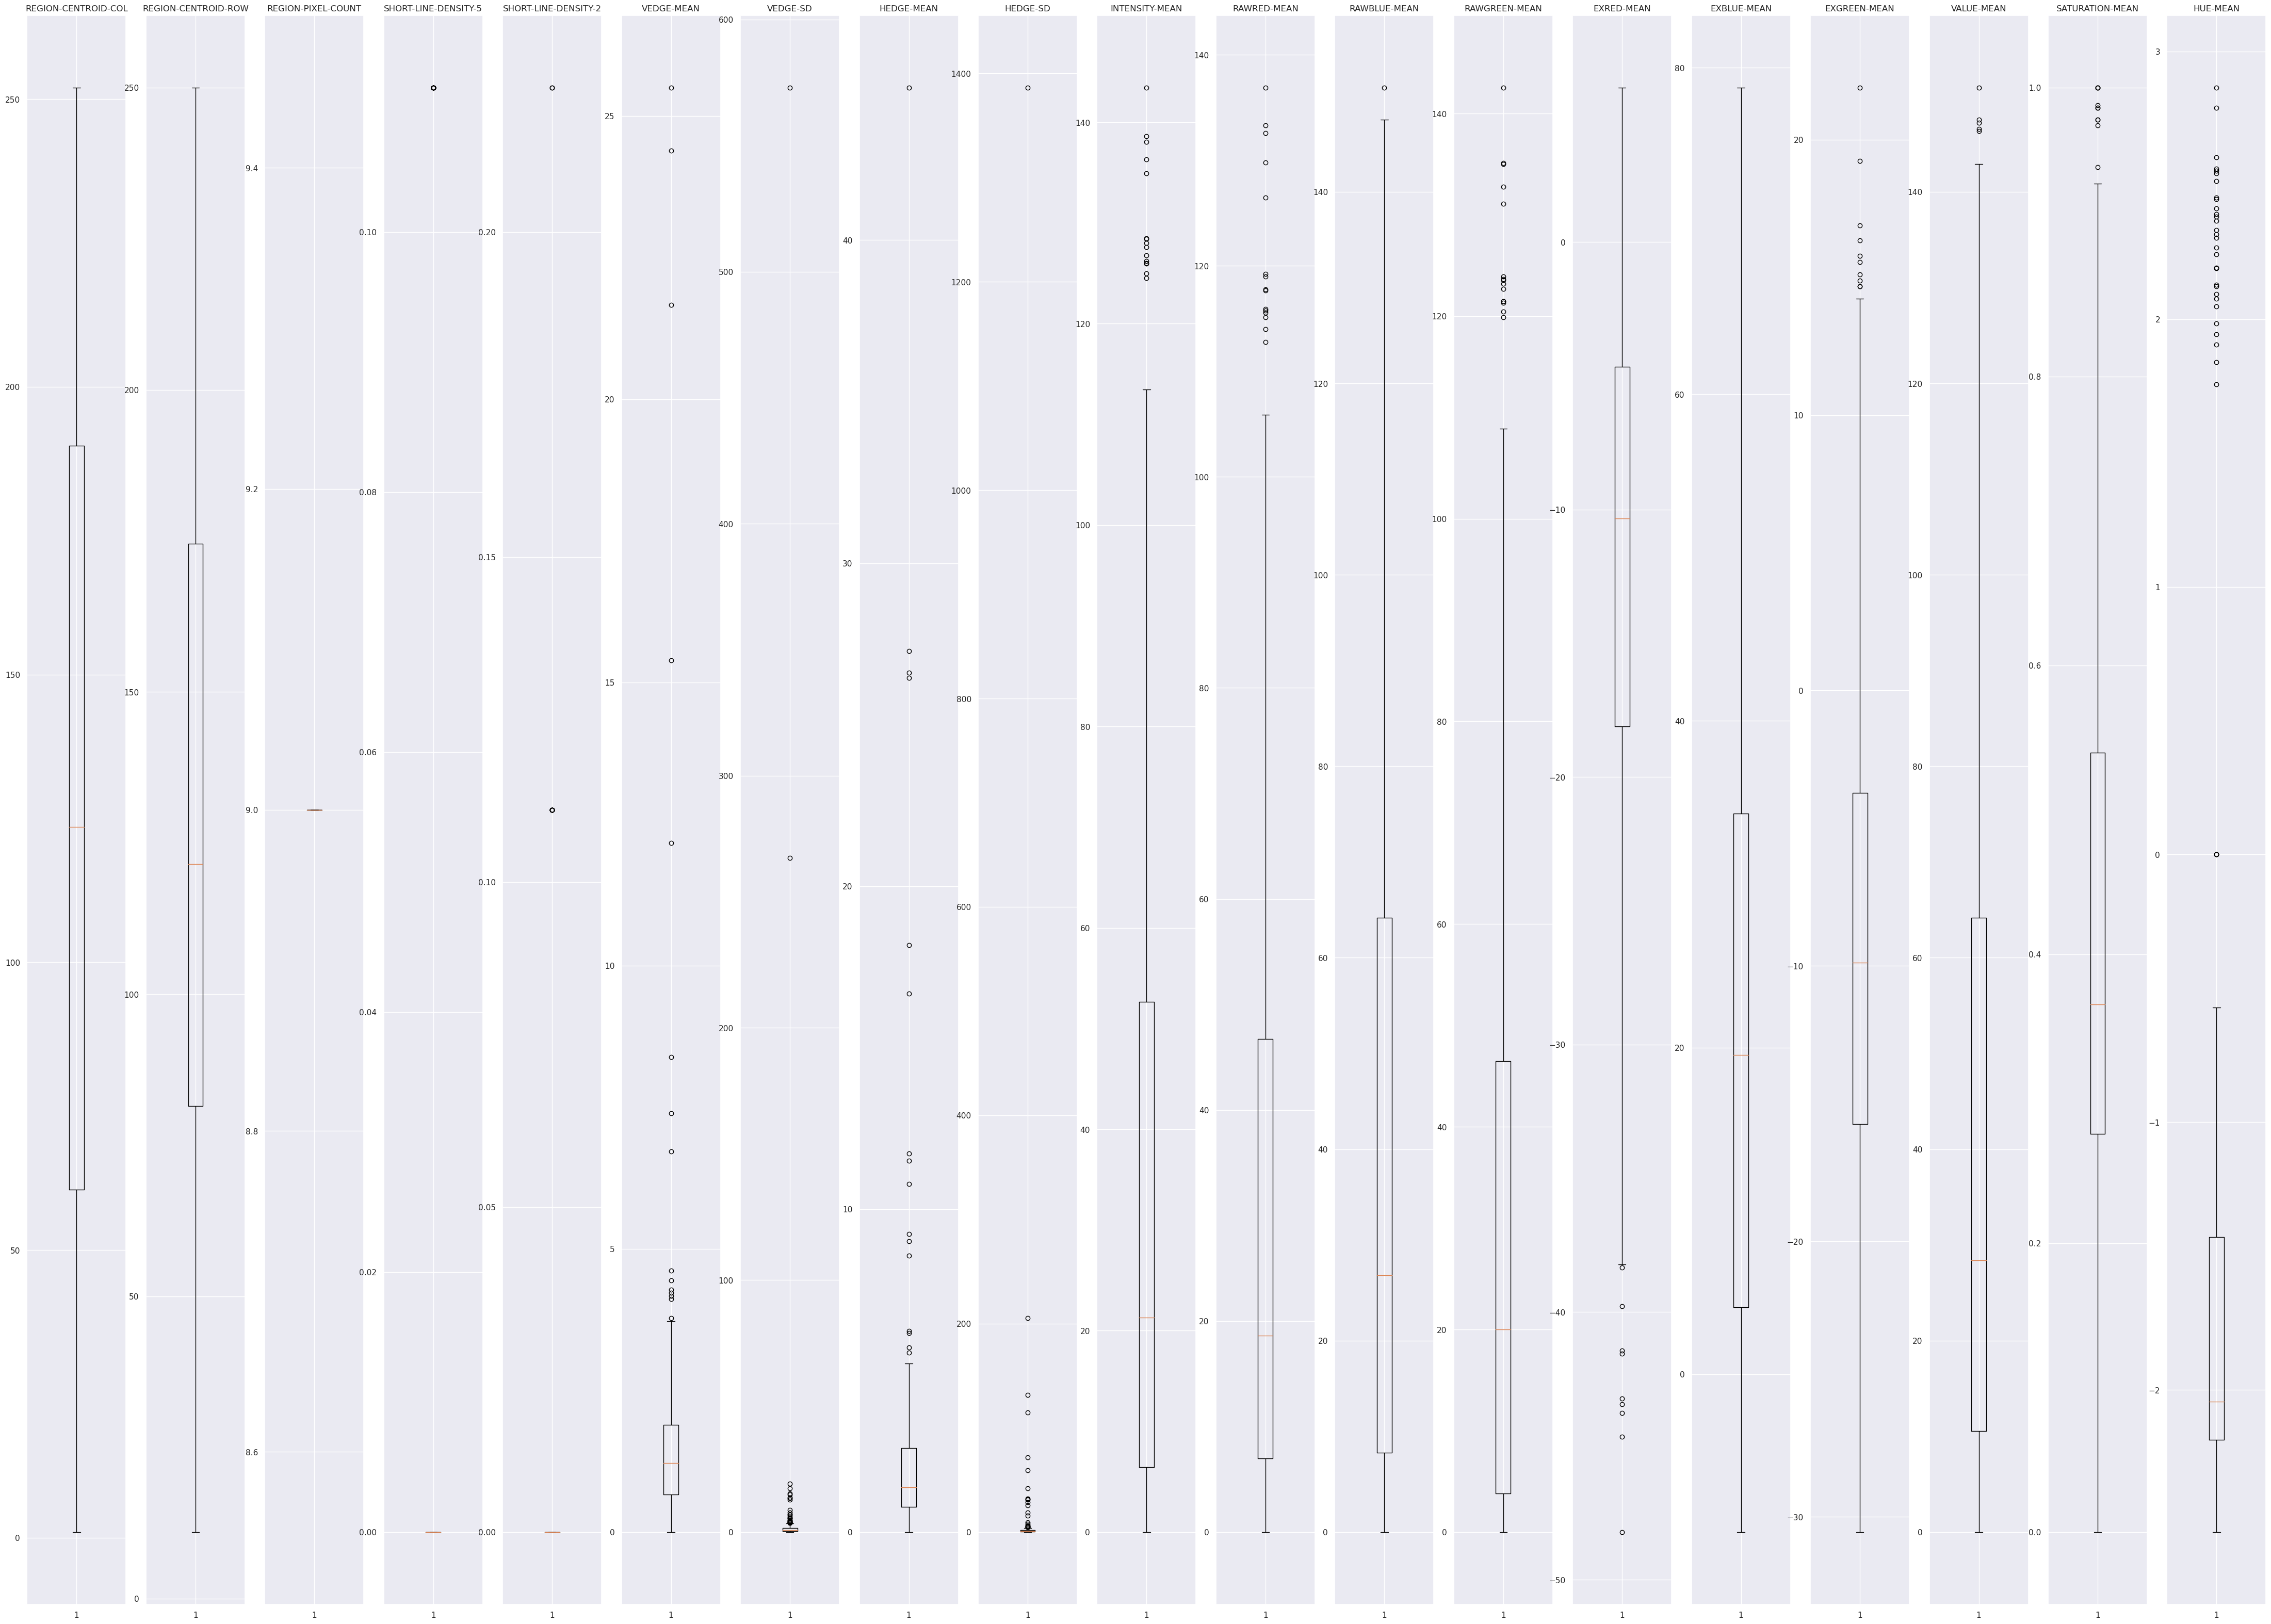

In [ ]:
fig6, ax6 = plt.subplots(1, len(names))
fig6.set_size_inches((56, 40))

for i in range(len(names)):
    x = data_x[names[i]].to_numpy().astype(np.float)
    ax6[i].boxplot(x)
    ax6[i].title.set_text(names[i])

plt.show()

REGION-CENTROID-COL  REGION-CENTROID-ROW  \
REGION-CENTROID-COL              1.000000             0.081868   
REGION-CENTROID-ROW              0.081868             1.000000   
REGION-PIXEL-COUNT                    NaN                  NaN   
SHORT-LINE-DENSITY-5            -0.109587             0.164906   
SHORT-LINE-DENSITY-2            -0.113007             0.022168   
VEDGE-MEAN                      -0.079825             0.012171   
VEDGE-SD                        -0.089668            -0.054820   
HEDGE-MEAN                      -0.077684             0.034361   
HEDGE-SD                        -0.066815            -0.036091   
INTENSITY-MEAN                   0.012867            -0.470674   
RAWRED-MEAN                      0.009511            -0.476086   
RAWBLUE-MEAN                     0.014851            -0.480821   
RAWGREEN-MEAN                    0.013613            -0.448783   
EXRED-MEAN                      -0.041434             0.333223   
EXBLUE-MEAN                      0.024445            -0.456954   
EXGREEN-MEAN                     0.001847             0.429070   
VALUE-MEAN                       0.016348            -0.460577   
SATURATION-MEAN                 -0.118124             0.064391   
HUE-MEAN                         0.050728             0.597449   

                      REGION-PIXEL-COUNT  SHORT-LINE-DENSITY-5  \
REGION-CENTROID-COL                  NaN             -0.109587   
REGION-CENTROID-ROW                  NaN              0.164906   
REGION-PIXEL-COUNT                   NaN                   NaN   
SHORT-LINE-DENSITY-5                 NaN              1.000000   
SHORT-LINE-DENSITY-2                 NaN              0.138629   
VEDGE-MEAN                           NaN             -0.024825   
VEDGE-SD                             NaN             -0.026879   
HEDGE-MEAN                           NaN             -0.020419   
HEDGE-SD                             NaN             -0.028937   
INTENSITY-MEAN                       NaN              0.004147   
RAWRED-MEAN                          NaN              0.001105   
RAWBLUE-MEAN                         NaN             -0.004500   
RAWGREEN-MEAN                        NaN              0.017243   
EXRED-MEAN                           NaN             -0.031430   
EXBLUE-MEAN                          NaN             -0.057163   
EXGREEN-MEAN                         NaN              0.130483   
VALUE-MEAN                           NaN              0.004905   
SATURATION-MEAN                      NaN             -0.064482   
HUE-MEAN                             NaN              0.222568   

                      SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  HEDGE-MEAN  \
REGION-CENTROID-COL              -0.113007   -0.079825 -0.089668   -0.077684   
REGION-CENTROID-ROW               0.022168    0.012171 -0.054820    0.034361   
REGION-PIXEL-COUNT                     NaN         NaN       NaN         NaN   
SHORT-LINE-DENSITY-5              0.138629   -0.024825 -0.026879   -0.020419   
SHORT-LINE-DENSITY-2              1.000000    0.373171  0.228926    0.397129   
VEDGE-MEAN                        0.373171    1.000000  0.582832    0.669766   
VEDGE-SD                          0.228926    0.582832  1.000000    0.617712   
HEDGE-MEAN                        0.397129    0.669766  0.617712    1.000000   
HEDGE-SD                          0.243559    0.530407  0.947943    0.677837   
INTENSITY-MEAN                    0.075280    0.052579  0.034435    0.064138   
RAWRED-MEAN                       0.068163    0.040889  0.026446    0.054864   
RAWBLUE-MEAN                      0.090468    0.067472  0.038993    0.071328   
RAWGREEN-MEAN                     0.063399    0.045661  0.036365    0.063893   
EXRED-MEAN                       -0.126925   -0.150631 -0.101717   -0.137752   
EXBLUE-MEAN                       0.168103    0.147422  0.060155    0.102944   
EXGREEN-MEAN                     -0.153286   -0.093121  0.004289   -0.030813   
VALUE-MEAN          

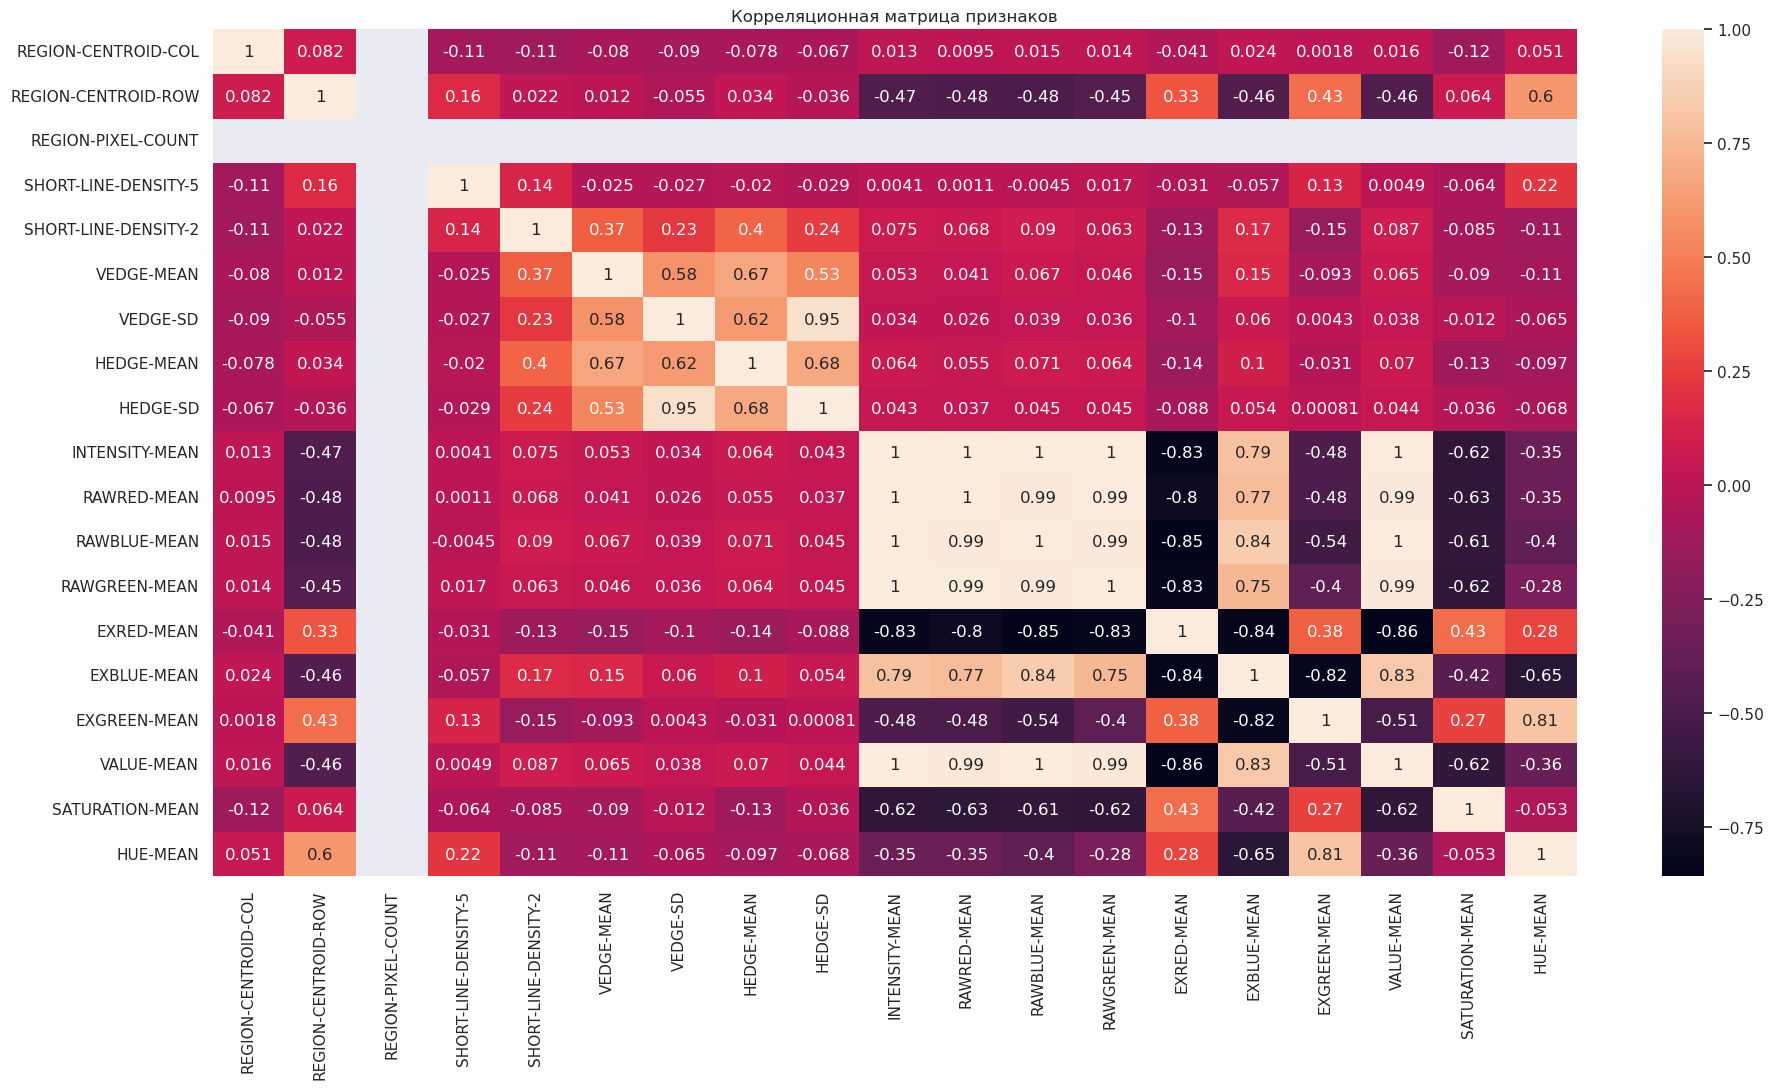

In [ ]:
# Создаём корреляционную матрицу
corr_matrix = data_x.loc[:, names].corr()

# Визуализация матрицы с помощью heatmap
fig = plt.gcf()
fig.set_size_inches((22, 11))
hm = sns.heatmap(corr_matrix, annot=True)
hm.set_title('Корреляционная матрица признаков')

corr_matrix

# Предобработка данных

In [ ]:
len_before_dropping = len(data.to_numpy())

data_wihout_dublicates = data.drop_duplicates(inplace=False)

len_after_dropping = len(data_wihout_dublicates.to_numpy())

print(f'{len_before_dropping}\n{len_after_dropping}')

210
210


In [ ]:
len_before_dropping = len(data_wihout_dublicates.to_numpy())

In [ ]:
data_cleared = data_wihout_dublicates

In [ ]:
data_cleared

REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
1                  140.0                125.0                   9   
2                  188.0                133.0                   9   
3                  105.0                139.0                   9   
4                   34.0                137.0                   9   
5                   39.0                111.0                   9   
..                   ...                  ...                 ...   
206                 36.0                243.0                   9   
207                186.0                218.0                   9   
208                197.0                236.0                   9   
209                208.0                240.0                   9   
210                223.0                185.0                   9   

     SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
1                0.000000                   0.0    0.277778  0.062963   
2                0.000000                   0.0    0.333333  0.266667   
3                0.000000                   0.0    0.277778  0.107407   
4                0.000000                   0.0    0.500000  0.166667   
5                0.000000                   0.0    0.722222  0.374074   
..                    ...                   ...         ...       ...   
206              0.111111                   0.0    1.888889  1.851851   
207              0.000000                   0.0    1.166667  0.744444   
208              0.000000                   0.0    2.444444  6.829628   
209              0.111111                   0.0    1.055556  0.862963   
210              0.000000                   0.0    0.500000  0.349603   

     HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
1      0.666667  0.311111        6.185185     7.333334      7.666666   
2      0.500000  0.077778        6.666666     8.333334      7.777778   
3      0.833333  0.522222        6.111111     7.555555      7.222222   
4      1.111111  0.474074        5.851852     7.777778      6.444445   
5      0.888889  0.429629        6.037037     7.000000      7.666666   
..          ...       ...             ...          ...           ...   
206    2.000000  0.711110       13.333333     9.888889     12.111111   
207    1.166667  0.655555       13.703704    10.666667     12.666667   
208    3.333333  7.599998       16.074074    13.111111     16.666668   
209    2.444444  5.007407       14.148149    10.888889     13.000000   
210    2.388889  2.080776       12.962963    11.555555      9.777778   

     RAWGREEN-MEAN  EXRED-MEAN  EXBLUE-MEAN  EXGREEN-MEAN  VALUE-MEAN  \
1         3.555556    3.444444     4.444445     -7.888889    7.777778   
2         3.888889    5.000000     3.333333     -8.333333    8.444445   
3         3.555556    4.333334     3.333333     -7.666666    7.555555   
4         3.333333    5.777778     1.777778     -7.555555    7.777778   
5         3.444444    2.888889     4.888889     -7.777778    7.888889   
..             ...         ...          ...           ...         ...   
206      18.000000  -10.333333    -3.666667     14.000000   18.000000   
207      17.777779   -9.111111    -3.111111     12.222222   17.777779   
208      18.444445   -8.888889     1.777778      7.111111   18.555555   
209      18.555555   -9.777778    -3.444444     13.222222   18.555555   
210      17.555555   -4.222222    -9.555555     13.777778   17.555555   

     SATURATION-MEAN  HUE-MEAN      class  
1           0.545635 -1.121818  BRICKFACE  
2           0.538580 -0.924817  BRICKFACE  
3           0.532628 -0.965946  BRICKFACE  
4           0.573633 -0.744272  BRICKFACE  
5           0.562919 -1.175773  BRICKFACE  
..               ...       ...        ...  
206         0.452229  2.368311      GRASS  
207         0.401347  2.382684      GRASS  
208         0.292729  2.789800      GRASS  
209         0.421621  2.392487      GRASS  
210         0.445418  1.838850      GRASS  

[210 rows x 20 columns]

REGION-CENTROID-COL  REGION-CENTROID-ROW  \
REGION-CENTROID-COL              1.000000             0.081868   
REGION-CENTROID-ROW              0.081868             1.000000   
REGION-PIXEL-COUNT                    NaN                  NaN   
SHORT-LINE-DENSITY-5            -0.109587             0.164906   
SHORT-LINE-DENSITY-2            -0.113007             0.022168   
VEDGE-MEAN                      -0.079825             0.012171   
VEDGE-SD                        -0.089668            -0.054820   
HEDGE-MEAN                      -0.077684             0.034361   
HEDGE-SD                        -0.066815            -0.036091   
INTENSITY-MEAN                   0.012867            -0.470674   
RAWRED-MEAN                      0.009511            -0.476086   
RAWBLUE-MEAN                     0.014851            -0.480821   
RAWGREEN-MEAN                    0.013613            -0.448783   
EXRED-MEAN                      -0.041434             0.333223   
EXBLUE-MEAN                      0.024445            -0.456954   
EXGREEN-MEAN                     0.001847             0.429070   
VALUE-MEAN                       0.016348            -0.460577   
SATURATION-MEAN                 -0.118124             0.064391   
HUE-MEAN                         0.050728             0.597449   

                      REGION-PIXEL-COUNT  SHORT-LINE-DENSITY-5  \
REGION-CENTROID-COL                  NaN             -0.109587   
REGION-CENTROID-ROW                  NaN              0.164906   
REGION-PIXEL-COUNT                   NaN                   NaN   
SHORT-LINE-DENSITY-5                 NaN              1.000000   
SHORT-LINE-DENSITY-2                 NaN              0.138629   
VEDGE-MEAN                           NaN             -0.024825   
VEDGE-SD                             NaN             -0.026879   
HEDGE-MEAN                           NaN             -0.020419   
HEDGE-SD                             NaN             -0.028937   
INTENSITY-MEAN                       NaN              0.004147   
RAWRED-MEAN                          NaN              0.001105   
RAWBLUE-MEAN                         NaN             -0.004500   
RAWGREEN-MEAN                        NaN              0.017243   
EXRED-MEAN                           NaN             -0.031430   
EXBLUE-MEAN                          NaN             -0.057163   
EXGREEN-MEAN                         NaN              0.130483   
VALUE-MEAN                           NaN              0.004905   
SATURATION-MEAN                      NaN             -0.064482   
HUE-MEAN                             NaN              0.222568   

                      SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  HEDGE-MEAN  \
REGION-CENTROID-COL              -0.113007   -0.079825 -0.089668   -0.077684   
REGION-CENTROID-ROW               0.022168    0.012171 -0.054820    0.034361   
REGION-PIXEL-COUNT                     NaN         NaN       NaN         NaN   
SHORT-LINE-DENSITY-5              0.138629   -0.024825 -0.026879   -0.020419   
SHORT-LINE-DENSITY-2              1.000000    0.373171  0.228926    0.397129   
VEDGE-MEAN                        0.373171    1.000000  0.582832    0.669766   
VEDGE-SD                          0.228926    0.582832  1.000000    0.617712   
HEDGE-MEAN                        0.397129    0.669766  0.617712    1.000000   
HEDGE-SD                          0.243559    0.530407  0.947943    0.677837   
INTENSITY-MEAN                    0.075280    0.052579  0.034435    0.064138   
RAWRED-MEAN                       0.068163    0.040889  0.026446    0.054864   
RAWBLUE-MEAN                      0.090468    0.067472  0.038993    0.071328   
RAWGREEN-MEAN                     0.063399    0.045661  0.036365    0.063893   
EXRED-MEAN                       -0.126925   -0.150631 -0.101717   -0.137752   
EXBLUE-MEAN                       0.168103    0.147422  0.060155    0.102944   
EXGREEN-MEAN                     -0.153286   -0.093121  0.004289   -0.030813   
VALUE-MEAN          

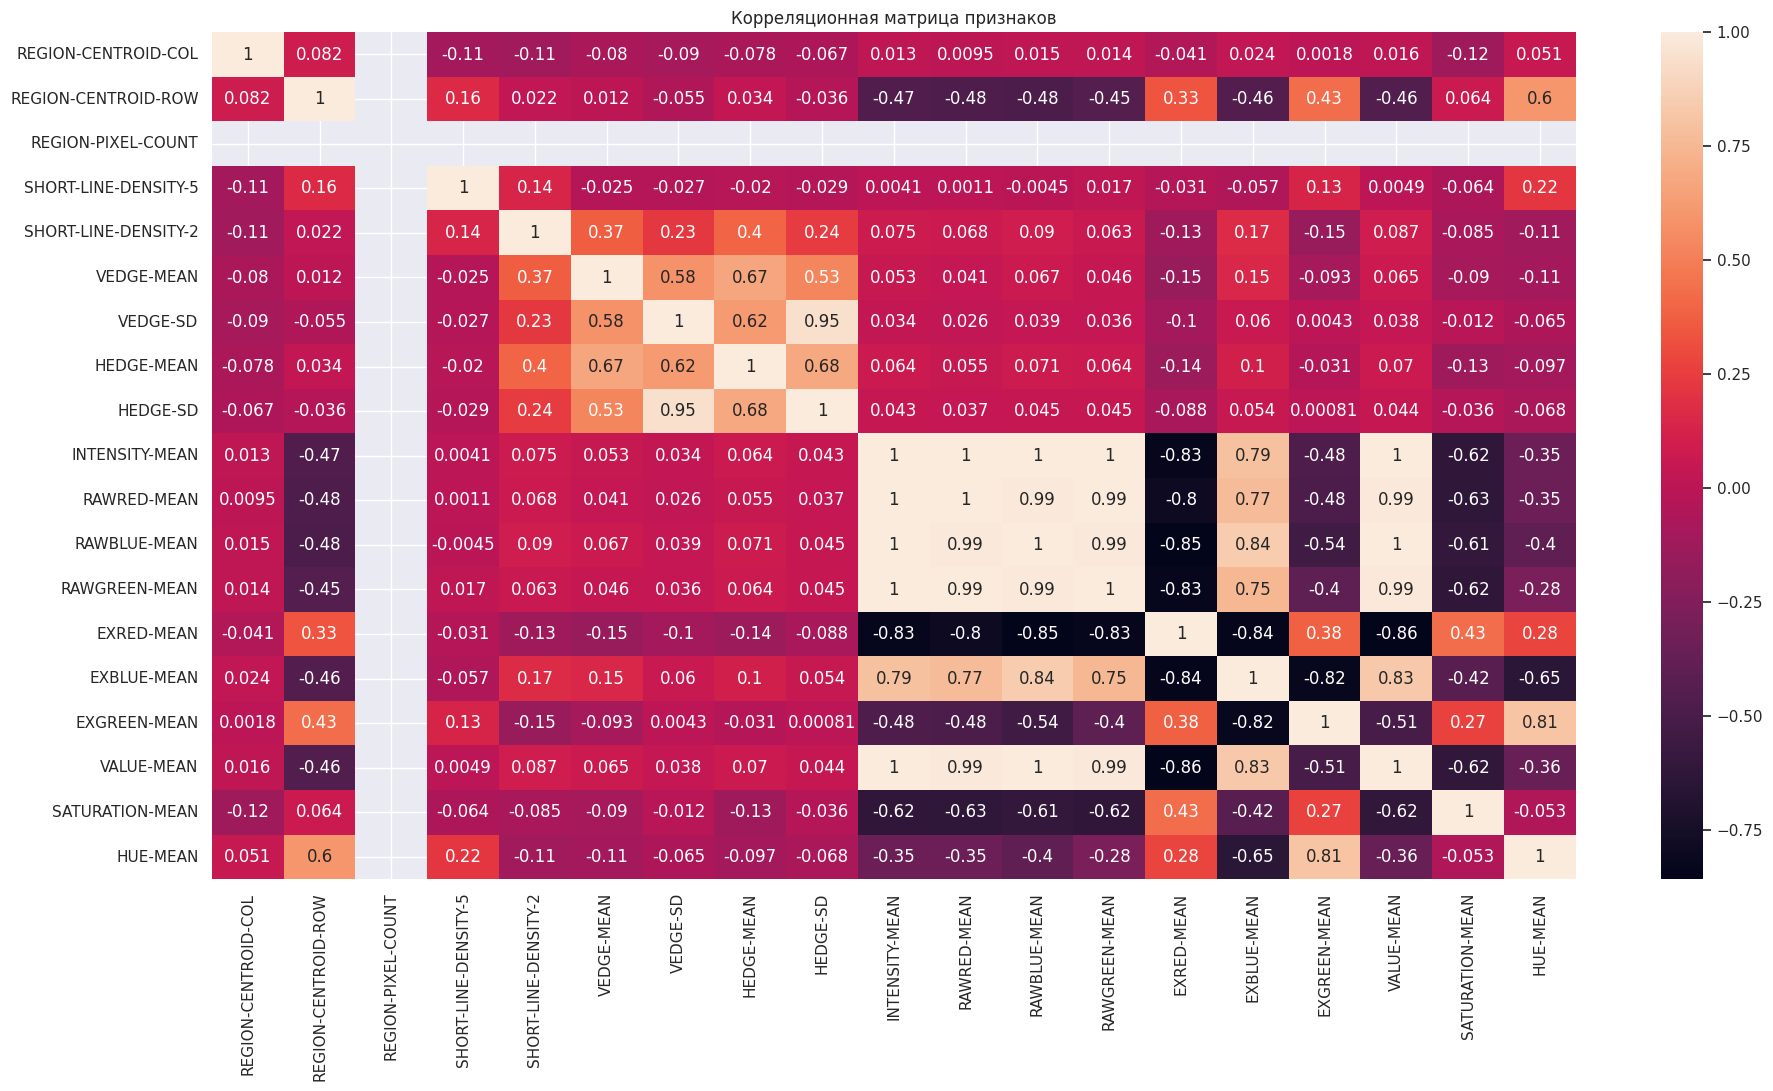

In [ ]:
# Создаём корреляционную матрицу
corr_matrix = data_cleared.loc[:, names].corr()

# Визуализация матрицы с помощью heatmap
fig = plt.gcf()
fig.set_size_inches((22, 11))
hm = sns.heatmap(corr_matrix, annot=True)
hm.set_title('Корреляционная матрица признаков')

corr_matrix

In [ ]:
data_cleared

REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
1                  140.0                125.0                   9   
2                  188.0                133.0                   9   
3                  105.0                139.0                   9   
4                   34.0                137.0                   9   
5                   39.0                111.0                   9   
..                   ...                  ...                 ...   
206                 36.0                243.0                   9   
207                186.0                218.0                   9   
208                197.0                236.0                   9   
209                208.0                240.0                   9   
210                223.0                185.0                   9   

     SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
1                0.000000                   0.0    0.277778  0.062963   
2                0.000000                   0.0    0.333333  0.266667   
3                0.000000                   0.0    0.277778  0.107407   
4                0.000000                   0.0    0.500000  0.166667   
5                0.000000                   0.0    0.722222  0.374074   
..                    ...                   ...         ...       ...   
206              0.111111                   0.0    1.888889  1.851851   
207              0.000000                   0.0    1.166667  0.744444   
208              0.000000                   0.0    2.444444  6.829628   
209              0.111111                   0.0    1.055556  0.862963   
210              0.000000                   0.0    0.500000  0.349603   

     HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
1      0.666667  0.311111        6.185185     7.333334      7.666666   
2      0.500000  0.077778        6.666666     8.333334      7.777778   
3      0.833333  0.522222        6.111111     7.555555      7.222222   
4      1.111111  0.474074        5.851852     7.777778      6.444445   
5      0.888889  0.429629        6.037037     7.000000      7.666666   
..          ...       ...             ...          ...           ...   
206    2.000000  0.711110       13.333333     9.888889     12.111111   
207    1.166667  0.655555       13.703704    10.666667     12.666667   
208    3.333333  7.599998       16.074074    13.111111     16.666668   
209    2.444444  5.007407       14.148149    10.888889     13.000000   
210    2.388889  2.080776       12.962963    11.555555      9.777778   

     RAWGREEN-MEAN  EXRED-MEAN  EXBLUE-MEAN  EXGREEN-MEAN  VALUE-MEAN  \
1         3.555556    3.444444     4.444445     -7.888889    7.777778   
2         3.888889    5.000000     3.333333     -8.333333    8.444445   
3         3.555556    4.333334     3.333333     -7.666666    7.555555   
4         3.333333    5.777778     1.777778     -7.555555    7.777778   
5         3.444444    2.888889     4.888889     -7.777778    7.888889   
..             ...         ...          ...           ...         ...   
206      18.000000  -10.333333    -3.666667     14.000000   18.000000   
207      17.777779   -9.111111    -3.111111     12.222222   17.777779   
208      18.444445   -8.888889     1.777778      7.111111   18.555555   
209      18.555555   -9.777778    -3.444444     13.222222   18.555555   
210      17.555555   -4.222222    -9.555555     13.777778   17.555555   

     SATURATION-MEAN  HUE-MEAN      class  
1           0.545635 -1.121818  BRICKFACE  
2           0.538580 -0.924817  BRICKFACE  
3           0.532628 -0.965946  BRICKFACE  
4           0.573633 -0.744272  BRICKFACE  
5           0.562919 -1.175773  BRICKFACE  
..               ...       ...        ...  
206         0.452229  2.368311      GRASS  
207         0.401347  2.382684      GRASS  
208         0.292729  2.789800      GRASS  
209         0.421621  2.392487      GRASS  
210         0.445418  1.838850      GRASS  

[210 rows x 20 columns]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)

_data_standart = pd.DataFrame(pca.fit_transform(data_wihout_dublicates[names]), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

_data_standart["class"] = data_cleared["class"]

In [ ]:
_data_test

PC1         PC2        PC3        PC4       PC5        PC6  \
0     -84.652451   -4.428224  -8.882381 -39.009572  2.705064  27.506522   
1     -84.348187  -28.540139  -7.578301 -39.773295  3.332495  26.871230   
2     -96.163866  115.471210 -17.903947 -78.895047  4.364670  19.054657   
3    -107.484284  -62.142089  -6.927148 -82.941026  6.397947  23.699118   
4     -79.607929  -17.947676  -8.239140 -39.513479  3.027246  28.980044   
...          ...         ...        ...        ...       ...        ...   
2095  -84.547855  -85.156156  -1.959358 -11.750751  2.370530  -4.760537   
2096  -87.821245 -108.456276  -0.286299 -17.646647  4.254536  -3.513133   
2097  -78.741458   10.280164  -9.028002  -5.842647  0.691106  -4.828990   
2098  -72.935460   31.658644  -9.312410  -2.425951  1.203524  -4.482685   
2099  -72.700958    6.093363  -7.911538  -9.903396  1.176517  -6.439002   

           PC7       PC8       PC9      PC10   class  
0     6.694869  0.641800  0.331658  2.828096     NaN  
1     6.553203  0.426836  0.281478  2.602167   GRASS  
2     2.599833 -1.317114  1.539097  1.410487   GRASS  
3     4.262006  1.407231  0.654165  2.082238   GRASS  
4     4.963636  0.545596  0.542104  2.847339   GRASS  
...        ...       ...       ...       ...     ...  
2095 -1.300540  1.822568 -0.240452 -1.359165  CEMENT  
2096 -0.731198  1.986030  0.514406 -1.742624  CEMENT  
2097 -1.910705  1.880657 -0.514758 -1.406713  CEMENT  
2098 -2.932534  0.541769  0.617447 -1.289086  CEMENT  
2099 -1.539819  0.575629 -0.374951 -1.303221  CEMENT  

[2100 rows x 11 columns]

In [ ]:
_data_standart = _data_standart.dropna()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
PC1   1.000000  0.000900  0.000193  0.000796  0.000327 -0.000186 -0.001625   
PC2   0.000900  1.000000 -0.000479 -0.001979 -0.000814  0.000463  0.004041   
PC3   0.000193 -0.000479  1.000000 -0.000424 -0.000174  0.000099  0.000865   
PC4   0.000796 -0.001979 -0.000424  1.000000 -0.000719  0.000409  0.003573   
PC5   0.000327 -0.000814 -0.000174 -0.000719  1.000000  0.000168  0.001468   
PC6  -0.000186  0.000463  0.000099  0.000409  0.000168  1.000000 -0.000835   
PC7  -0.001625  0.004041  0.000865  0.003573  0.001468 -0.000835  1.000000   
PC8  -0.000330  0.000820  0.000176  0.000725  0.000298 -0.000169 -0.001480   
PC9  -0.000285  0.000710  0.000152  0.000628  0.000258 -0.000147 -0.001282   
PC10  0.000066 -0.000165 -0.000035 -0.000146 -0.000060  0.000034  0.000297   

           PC8       PC9      PC10  
PC1  -0.000330 -0.000285  0.000066  
PC2   0.000820  0.000710 -0.000165  
PC3   0.000176  0.000152 -0.000035  
PC4   0.000725  0.000628 -0.000146  
PC5   0.000298  0.000258 -0.000060  
PC6  -0.000169 -0.000147  0.000034  
PC7  -0.001480 -0.001282  0.000297  
PC8   1.000000 -0.000260  0.000060  
PC9  -0.000260  1.000000  0.000052  
PC10  0.000060  0.000052  1.000000

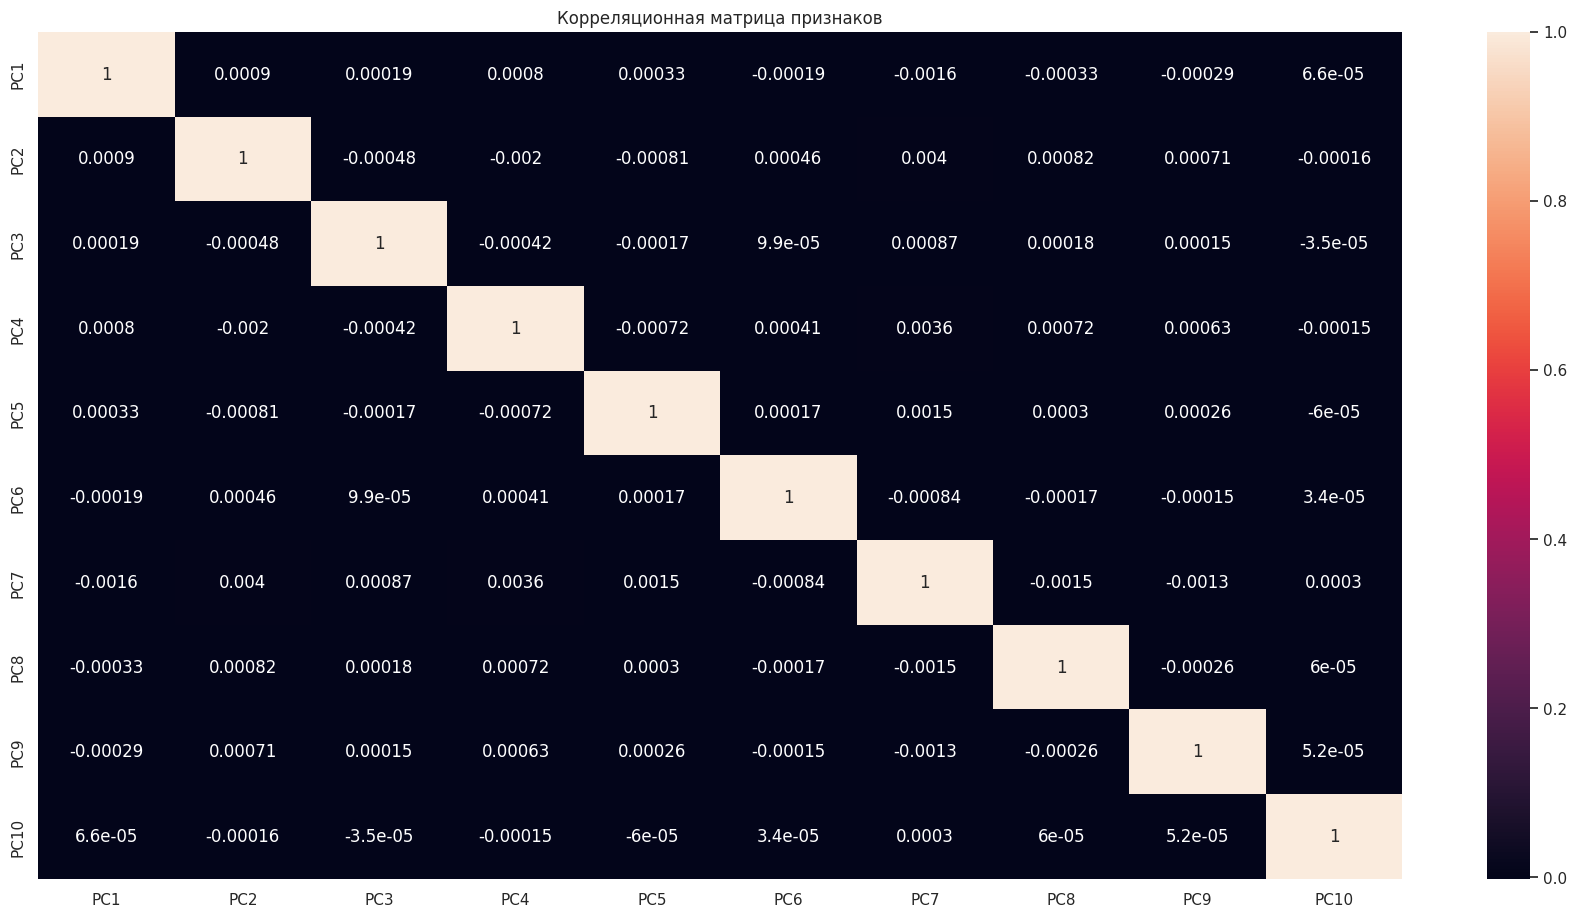

In [ ]:
# Создаём корреляционную матрицу
corr_matrix = _data_standart.corr()

# Визуализация матрицы с помощью heatmapW
fig = plt.gcf()
fig.set_size_inches((22, 11))
hm = sns.heatmap(corr_matrix, annot=True)
hm.set_title('Корреляционная матрица признаков')

corr_matrix

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.metrics import BinaryAccuracy

In [ ]:
firstLayerAmountOfNeurons  = 20
secondLayerAmountOfNeurons = 20
thirdLayerAmountOfNeurons = 10

firstLayerActivation  = 'sigmoid'
secondLayerActivation = 'sigmoid'
thirdLayerActivation = 'sigmoid'


trainPercent      = 0.6
validationPercent = 0.3
testPercent       = 1 - trainPercent - validationPercent

learning_rate  = 0.01
batch_size     = 1

In [ ]:
_data      = _data_standart.to_numpy()
data_size  = len(_data)
batch_size = 1

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(["BRICKFACE", "SKY", "FOLIAGE", "CEMENT", "WINDOW", "PATH", "GRASS"])

_data[:, -1] = le.transform(_data[:, -1])

trainAmount      = int(data_size * trainPercent)
validationAmount = int(data_size * validationPercent)
testAmount       = data_size - trainAmount - validationAmount

print(f'{trainAmount}')
print(f'{validationAmount}')

np.random.shuffle(_data)

_data_train      = _data[:trainAmount]
_data_validation = _data[trainAmount:trainAmount+validationAmount]
_data_test       = _data[trainAmount+validationAmount:]

_data_train_x = _data_train[:, :-1]
_data_train_y = _data_train[:, -1]

_data_validation_x = _data_validation[:, :-1]
_data_validation_y = _data_validation[:, -1]

_data_test_x = _data_test[:, :-1]
_data_test_y = _data_test[:, -1]

#-------

x_train = _data_train_x.copy()
x_val = _data_validation_x.copy()
x_test = _data_test_x.copy()

y_train = _data_train_y.copy()
y_val = _data_validation_y.copy()
y_test = _data_test_y.copy()

125
62


In [ ]:
# Метод инициализации Хавьера
kernel_initializer = tf.keras.initializers.TruncatedNormal(seed=1)
bias_initializer   = tf.keras.initializers.TruncatedNormal(seed=1)

In [ ]:
n_components = 10

In [ ]:
inputLayer = tf.keras.layers.Input(shape=(n_components,))

firstHiddenLayer = tf.keras.layers.Dense(
    firstLayerAmountOfNeurons,
    activation        =firstLayerActivation,
    kernel_initializer=kernel_initializer,
    bias_initializer  =bias_initializer,
    name              ='First_Hidden'
)(inputLayer)

secondHiddenLayer = tf.keras.layers.Dense(
    secondLayerAmountOfNeurons,
    activation        =secondLayerActivation,
    kernel_initializer=kernel_initializer,
    bias_initializer  =bias_initializer,
    name              ='Second_Hidden'
)(firstHiddenLayer)

thirdHiddenLayer = tf.keras.layers.Dense(
    thirdLayerAmountOfNeurons,
    activation        =thirdLayerActivation,
    kernel_initializer=kernel_initializer,
    bias_initializer  =bias_initializer,
    name              ='Third_Hidden'
)(secondHiddenLayer)

outputLayer = tf.keras.layers.Dense(
    7,
    activation='softmax',
    name='Output'
)(thirdHiddenLayer)

model = keras.Model(inputs=inputLayer, outputs=outputLayer)

model.compile(
    optimizer=tf.keras.optimizers.SGD(
        lr=learning_rate
    ),
    loss='categorical_crossentropy'
)

model.summary()
model.save('./models/model_sgd_1.h5')
model.save_weights('./weights/weight_1')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 First_Hidden (Dense)        (None, 20)                220       
                                                                 
 Second_Hidden (Dense)       (None, 20)                420       
                                                                 
 Third_Hidden (Dense)        (None, 10)                210       
                                                                 
 Output (Dense)              (None, 7)                 77        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable params: 0
_________________________________________________________________


Gradient Descent

In [ ]:
from keras import backend as K

In [ ]:
l_rates = [
    0.1
][::-1]

amountOfEpochs = 100

errors = dict()

_data_train_x = K.cast_to_floatx(_data_train_x)
_data_train_y = K.cast_to_floatx(_data_train_y)
_data_validation_x = K.cast_to_floatx(_data_validation_x)
_data_validation_y = K.cast_to_floatx(_data_validation_y)
_data_test_x = K.cast_to_floatx(_data_test_x)
_data_test_y =  K.cast_to_floatx(_data_test_y)

# Convert label-encoded classes to one-hot encoded vectors
train_y = tf.keras.utils.to_categorical(_data_train_y, num_classes=7)
validation_y = tf.keras.utils.to_categorical(_data_validation_y, num_classes=7)
test_y = tf.keras.utils.to_categorical(_data_test_y, num_classes=7)

In [ ]:
amountOfEpochs = 100

In [ ]:
l_rates =[1, 0.1, 0.01, 0.005, 0.001]

for lr in l_rates:
    errors[lr] = {
        'Train':[],
        'Validation':[],
        'Test': [],
        'Epoch':[]
    }

    model.load_weights('./weights/weight_1')

    model = keras.Model(inputs=inputLayer, outputs=outputLayer)

    model.compile(
        optimizer=tf.keras.optimizers.SGD(
            lr=lr,
        ),
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy']
    )

    currentEpoch = 1

    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x,
            y              =train_y,
            epochs         =1,
            validation_data=(_data_validation_x, validation_y),
            batch_size=1,
            verbose=0
        )

        errors[lr]['Train'     ].append(model.evaluate(_data_train_x, train_y, batch_size=batch_size, verbose=0))
        errors[lr]['Validation'].append(model.evaluate(_data_validation_x, validation_y, batch_size=batch_size, verbose=1))
        errors[lr]['Test'      ].append(model.evaluate(_data_test_x, test_y, batch_size=batch_size, verbose=0))
        errors[lr]['Epoch'     ].append(currentEpoch)

        currentEpoch += 1

62/62 [==============================] - 0s 2ms/step - loss: 1.3731 - categorical_accuracy: 0.4677


62/62 [==============================] - 0s 1ms/step - loss: 1.4047 - categorical_accuracy: 0.5000


62/62 [==============================] - 0s 2ms/step - loss: 1.3412 - categorical_accuracy: 0.5000


62/62 [==============================] - 0s 3ms/step - loss: 1.3447 - categorical_accuracy: 0.4839


62/62 [==============================] - 0s 2ms/step - loss: 1.3473 - categorical_accuracy: 0.4839


Train loss: 	[1.03107393 0.56800002]
Test loss: 	[1.1951555  0.27272728]

Train loss: 	[1.03478384 0.56      ]
Test loss: 	[1.17585361 0.31818181]

Train loss: 	[1.01059771 0.57599998]
Test loss: 	[1.15442383 0.31818181]

Train loss: 	[1.01349247 0.58399999]
Test loss: 	[1.16716123 0.27272728]

Train loss: 	[1.00539482 0.57599998]
Test loss: 	[1.14711976 0.31818181]



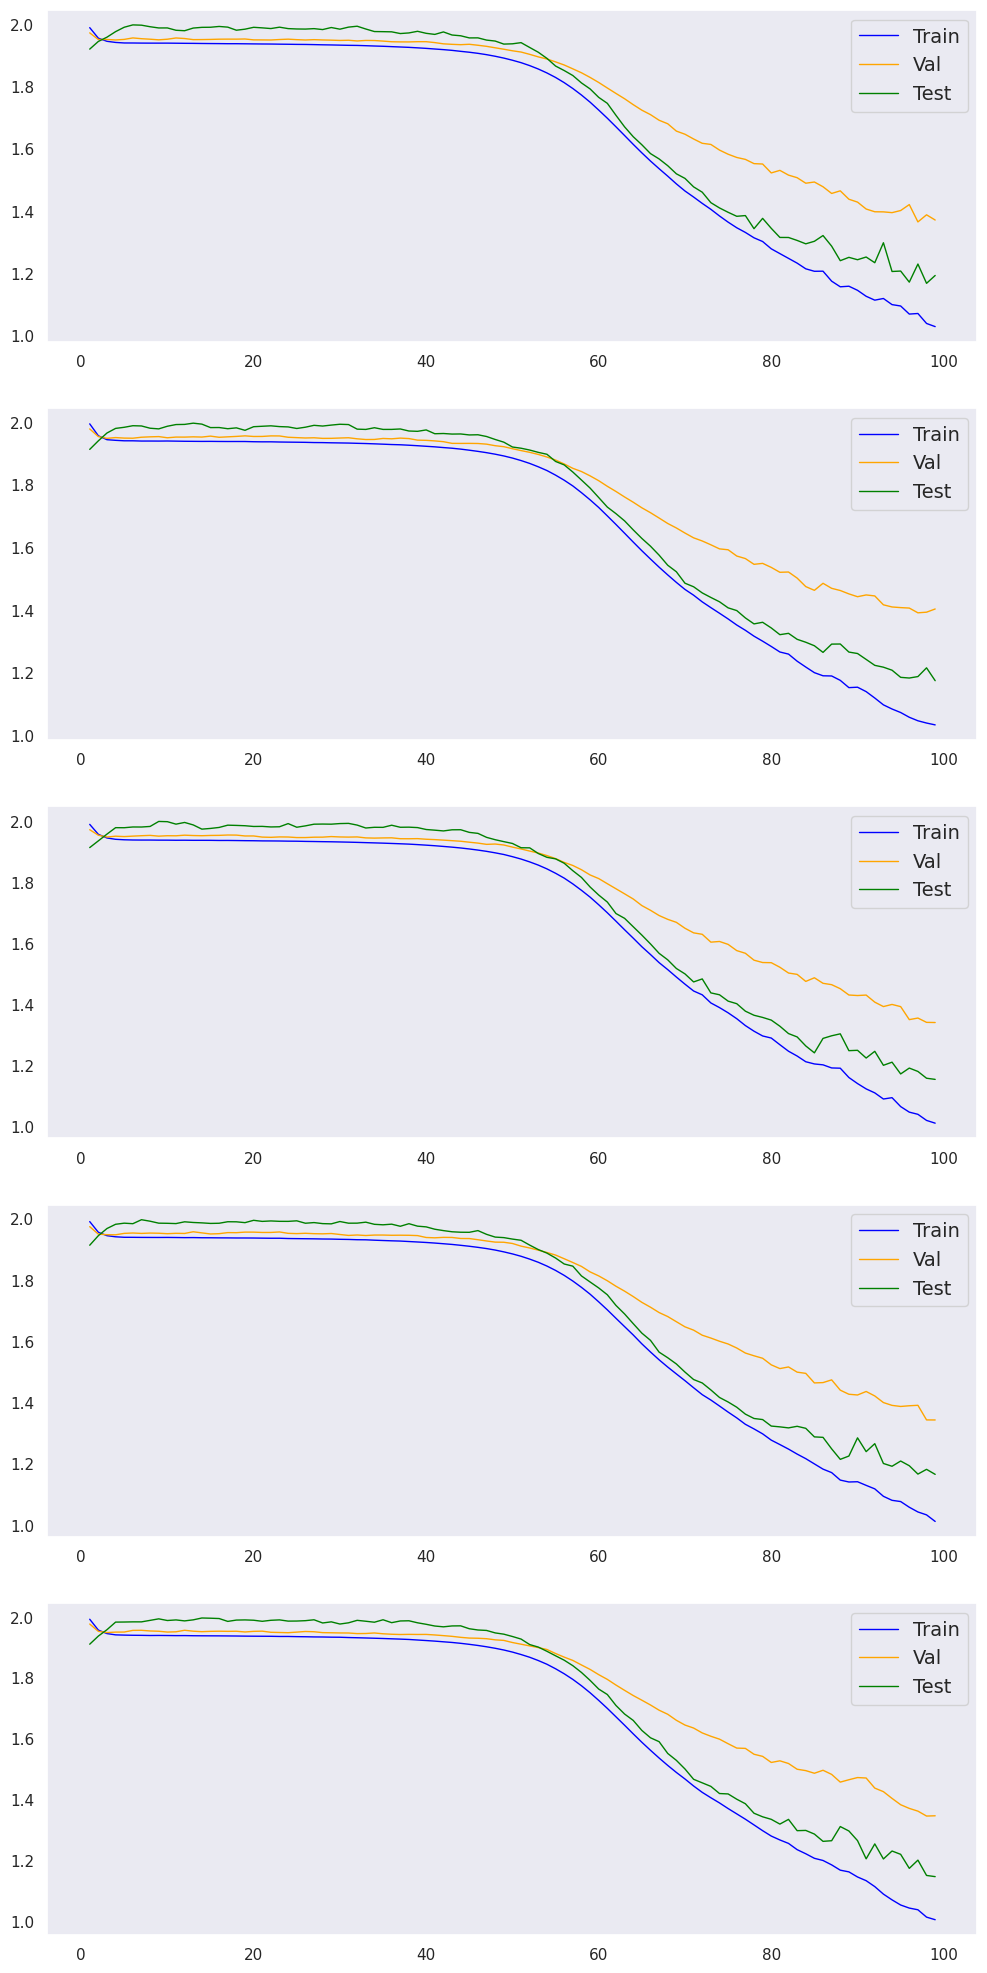

In [ ]:
fig8, ax8 = plt.subplots(5, 1)
fig8.set_size_inches((12, 25))

for i in range(5):
    ax8[i].plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Train'])[:, 0],      label='Train',      linewidth=1, color="blue")
    ax8[i].plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Validation'])[:, 0], label='Val',        linewidth=1, color="orange")
    ax8[i].plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Test'])[:, 0],       label='Test',       linewidth=1, color="green")
    ax8[i].legend(fontsize=14)
    ax8[i].grid()
    train_loss = np.array(errors[l_rates[i]]['Train'])[-1]
    test_loss = np.array(errors[l_rates[i]]['Test'])[-1]
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

Another GD

In [ ]:
import neupy
from neupy import algorithms
from neupy.algorithms import *

In [ ]:
optimizers = []
steps = [0.01]
for i in range(len(steps)):
    epochs = 6000
    network = join(
        Input(len(names)),
        Sigmoid(20, weight = neupy.init.XavierNormal()),
        Sigmoid(20, weight = neupy.init.XavierNormal()),
        Sigmoid(10, weight = neupy.init.XavierNormal()),
        Linear(1, weight = neupy.init.XavierNormal()),
    )

    optimizer = algorithms.GradientDescent(network, error = 'mse',
                                          step = steps[i], show_epoch = epochs//10, verbose = True)
    optimizer.train(_data_train_x, _data_train_y, _data_validation_x, _data_validation_y, epochs = epochs)
    optimizers.append(optimizer)


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 600
[OPTION] shuffle_data = False
[OPTION] step = 0.01
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 2.41 seconds

Start training

[TRAINING DATA] shapes: (126, 19)
[TEST DATA] shapes: (63, 19)
[TRAINING] Total epochs: 6000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |        21.1 |      21.419 |        1 ms |
|         600 |      3.5766 |      4.3667 |        1 ms |
|        1200 |      2.4718 |      3.7461 |      926 μs |
|        1800 |      2.0444 |      3.2508 |      698 μs |
|        2400 |      1.8469 |       5.181 |      700 μs |
|        3000 |      2.1327 |      3.4658 |

					  alpha = 0.01


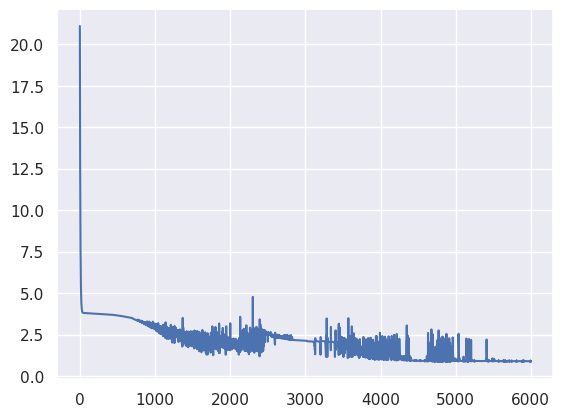

In [ ]:
for i in range(len(steps)):
    print('\t' * 5 + '  alpha = ' + str(steps[i]))
    plt.plot(optimizers[i].errors)

GDM

In [ ]:
import neupy

In [ ]:
optimizers_GDM = []
momentums = [0, 0.5, 0.9, 0.99]
for i in range(len(momentums)):
    epochs = 7000
    network = join(
        Input(n_components),
        Sigmoid(20, weight = neupy.init.XavierNormal()),
        Sigmoid(20, weight = neupy.init.XavierNormal()),
        Sigmoid(10, weight = neupy.init.XavierNormal()),
        Softmax(7, weight = neupy.init.XavierNormal()),
    )
    optimizer = algorithms.Momentum(network, step=0.01,
                                    error = 'categorical_crossentropy',
                                    momentum = momentums[i],
                                    show_epoch = epochs//10, verbose = True)
    optimizer.train(_data_train_x, train_y, _data_validation_x, validation_y, epochs = epochs)
    optimizers_GDM.append(optimizer)


Main information

[ALGORITHM] Momentum

[OPTION] batch_size = 128
[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 700
[OPTION] shuffle_data = False
[OPTION] step = 0.01
[OPTION] train_end_signal = None
[OPTION] error = categorical_crossentropy
[OPTION] addons = None
[OPTION] momentum = 0
[OPTION] nesterov = False

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 1.96 seconds

Start training

[TRAINING DATA] shapes: (125, 10)
[TEST DATA] shapes: (62, 10)
[TRAINING] Total epochs: 7000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      2.1039 |      2.0445 |        1 ms |
|         700 |      1.8871 |      1.9711 |        1 ms |
|        1400 |      1.8449 |      1.9381 |      772 μs |
|        2100 |      1.7844 |      1.8848 |      773 μs |
|        2800

					  momentum = 0
					  momentum = 0.5
					  momentum = 0.9
					  momentum = 0.99


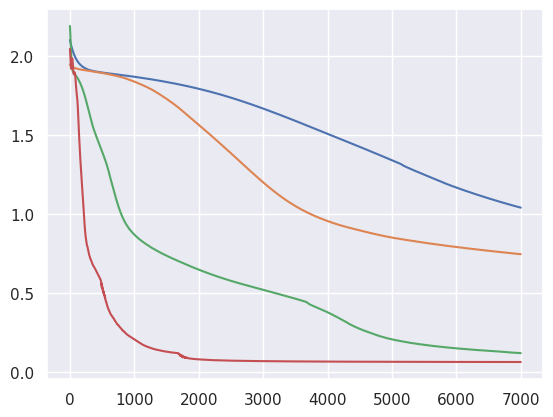

In [ ]:
for i in range(len(momentums)):
    print('\t' * 5 + '  momentum = ' + str(momentums[i]))
    plt.plot(optimizers_GDM[i].errors)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.metrics import CategoricalCrossentropy
m = CategoricalCrossentropy()

In [ ]:
for i in range(len(momentums)):
    m.update_state(optimizers_GDM[i].predict(_data_train_x), train_y)
    tr = m.result().numpy()

    m.update_state(optimizers_GDM[i].predict(_data_test_x), test_y)
    te = m.result().numpy()
    print("\nMomentum=" + str(momentums[i]), "\n", tr, '\n', te, sep='')


Momentum=0
4.3100924
4.584478

Momentum=0.5
5.0555086
5.168616

Momentum=0.9
4.4930997
4.5190463

Momentum=0.99
3.9679923
3.9971893


NAD

In [ ]:
optimizers_NAD = []
momentums = [0, 0.5, 0.9, 0.99]
for i in range(len(momentums)):
    epochs = 50000
    network = join(
        Input(n_components),
        Sigmoid(20, weight = neupy.init.XavierNormal()),
        Sigmoid(20, weight = neupy.init.XavierNormal()),
        Sigmoid(10, weight = neupy.init.XavierNormal()),
        Softmax(7, weight = neupy.init.XavierNormal()),
    )
    optimizer = algorithms.Momentum(network, step=0.001,
                                    error = 'categorical_crossentropy',
                                    momentum = momentums[i], nesterov = True,
                                    show_epoch = epochs//10, verbose = True)
    optimizer.train(_data_train_x, train_y, _data_validation_x, validation_y, epochs = epochs)
    optimizers_NAD.append(optimizer)


Main information

[ALGORITHM] Momentum

[OPTION] batch_size = 128
[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 5000
[OPTION] shuffle_data = False
[OPTION] step = 0.001
[OPTION] train_end_signal = None
[OPTION] error = categorical_crossentropy
[OPTION] addons = None
[OPTION] momentum = 0
[OPTION] nesterov = True

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 1.03 seconds

Start training

[TRAINING DATA] shapes: (125, 10)
[TEST DATA] shapes: (62, 10)
[TRAINING] Total epochs: 50000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      2.0764 |      1.9318 |        1 ms |
|        5000 |      1.9086 |      1.9803 |      794 μs |
|       10000 |      1.8825 |      1.9758 |       12 ms |
|       15000 |      1.8478 |      1.9496 |      431 μs |
|       200

INFO:theano.gof.compilelock:Refreshing lock /root/.theano/compiledir_Linux-5.15.107+-x86_64-with-glibc2.31-x86_64-3.10.11-64/lock_dir/lock


[THEANO] Initialization finished successfully. It took 3.15 seconds

Start training

[TRAINING DATA] shapes: (125, 10)
[TEST DATA] shapes: (62, 10)
[TRAINING] Total epochs: 50000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      1.9876 |      2.2176 |        1 ms |
|        5000 |      1.8708 |      1.9645 |      500 μs |
|       10000 |      1.7788 |      1.8852 |      417 μs |
|       15000 |       1.608 |      1.7414 |      770 μs |
|       20000 |      1.4173 |      1.5847 |      857 μs |
|       25000 |      1.2441 |      1.4421 |      756 μs |
|       30000 |      1.0882 |      1.3268 |      443 μs |
|       35000 |     0.96125 |      1.2454 |      441 μs |
|       40000 |     0.87346 |      1.1745 |      412 μs |
|       45000 |     0.80909 |      1.1202 |      519 μs |
|       50000 |     0.75863 |      1.0809 |      732 μs |
--------

INFO:theano.gof.compilelock:Refreshing lock /root/.theano/compiledir_Linux-5.15.107+-x86_64-with-glibc2.31-x86_64-3.10.11-64/lock_dir/lock


[THEANO] Initialization finished successfully. It took 0.65 seconds

Start training

[TRAINING DATA] shapes: (125, 10)
[TEST DATA] shapes: (62, 10)
[TRAINING] Total epochs: 50000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      2.0327 |      2.1443 |      905 μs |
|        5000 |     0.33009 |     0.97752 |      434 μs |
|       10000 |     0.13318 |     0.78462 |      466 μs |
|       15000 |    0.063699 |      1.1856 |      447 μs |
|       20000 |    0.043013 |      1.4224 |      730 μs |
|       25000 |    0.036785 |      1.8214 |      718 μs |
|       30000 |    0.034402 |      1.9114 |      499 μs |
|       35000 |    0.033121 |       1.969 |      439 μs |
|       40000 |    0.032325 |      2.0072 |      453 μs |
|       45000 |    0.031785 |      2.0342 |      759 μs |
|       50000 |    0.031395 |      2.0539 |      442 μs |
--------

Fletcher-Reeves

In [ ]:
epochs = 30
network = join(
    Input(n_components),
    Sigmoid(20, weight = neupy.init.XavierNormal()),
    Sigmoid(20, weight = neupy.init.XavierNormal()),
    Sigmoid(10, weight = neupy.init.XavierNormal()),
    Softmax(7, weight = neupy.init.XavierNormal()),
)
optimizer_FR = algorithms.ConjugateGradient(network,
                                update_function = 'fletcher_reeves',
                                error = 'categorical_crossentropy',
                                show_epoch = epochs//10)
optimizer_FR.train(_data_train_x, train_y, _data_validation_x, validation_y, epochs = epochs)

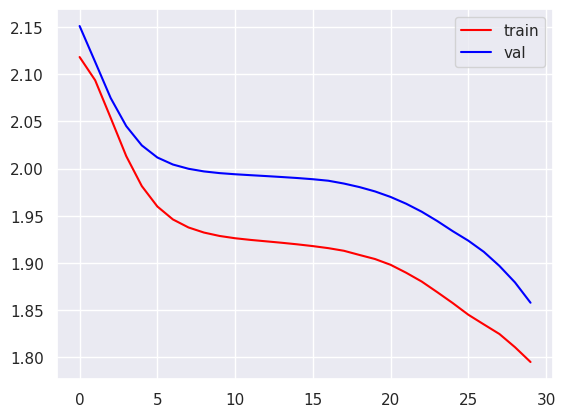

In [ ]:
plt.plot(optimizer_FR.train_errors, label="train", color="red")
plt.plot(optimizer_FR.validation_errors, label="val", color="blue")
plt.legend()
plt.show()

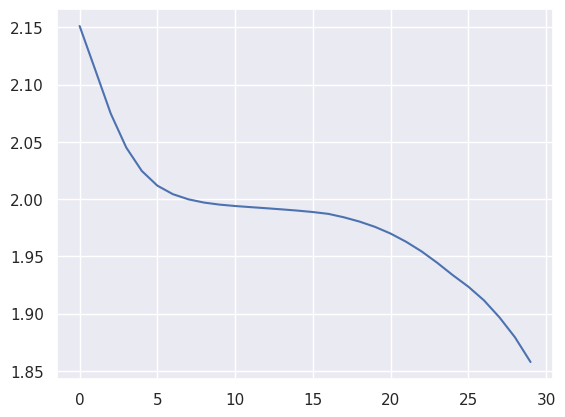

In [ ]:
plt.plot(optimizer_FR.validation_errors)

					Метод Флетчера-Ривса


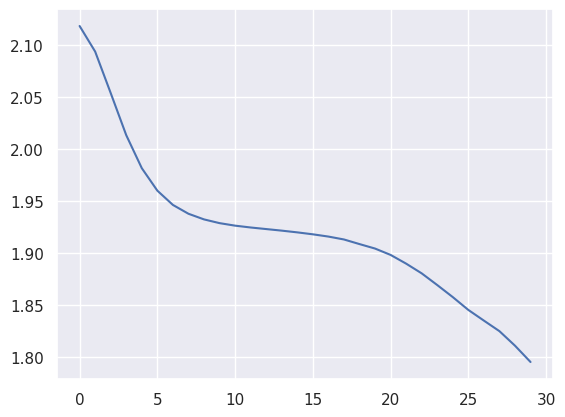

In [ ]:
print('\t' * 5 + 'Метод Флетчера-Ривса')
plt.plot(optimizer_FR.errors)

In [ ]:
m.update_state(optimizer_FR.predict(_data_train_x), train_y)
tr = m.result().numpy()

m.update_state(optimizer_FR.predict(_data_test_x), test_y)
te = m.result().numpy()
print("\n" + str(momentums[i]), "\n", tr, '\n', te, sep='')


0.99
5.1522117
5.3281546


Polak-Riber

In [ ]:
epochs = 100000
network = join(
    Input(n_components),
    Sigmoid(20, weight = neupy.init.XavierNormal()),
    Sigmoid(20, weight = neupy.init.XavierNormal()),
    Sigmoid(10, weight = neupy.init.XavierNormal()),
    Softmax(7, weight = neupy.init.XavierNormal()),
)
optimizer_PR = algorithms.ConjugateGradient(network,
                                update_function = 'polak_ribiere',
                                error = 'categorical_crossentropy',
                                step = 0.001,
                                show_epoch = epochs//10,
                                verbose = True)
optimizer_PR.train(_data_train_x, train_y, _data_validation_x, validation_y, epochs = epochs)


Main information

[ALGORITHM] ConjugateGradient

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 10000
[OPTION] shuffle_data = False
[OPTION] step = 0.001
[OPTION] train_end_signal = None
[OPTION] error = categorical_crossentropy
[OPTION] addons = None
[OPTION] update_function = polak_ribiere

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 1.81 seconds

Start training

[TRAINING DATA] shapes: (125, 10)
[TEST DATA] shapes: (62, 10)
[TRAINING] Total epochs: 100000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      1.9766 |      2.0498 |        1 ms |
|       10000 |      1.8943 |      1.9798 |      498 μs |
|       20000 |      1.8289 |      1.9337 |      492 μs |
|       30000 |      1.6943 |      1.8338 |      504 μs |
|       40000 |      1.5435 |   

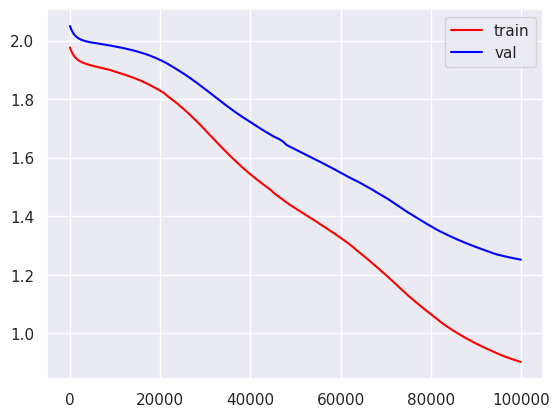

In [ ]:
plt.plot(optimizer_PR.train_errors, label="train", color="red")
plt.plot(optimizer_PR.validation_errors, label="val", color="blue")
plt.legend()
plt.show()

In [ ]:
%pip install TensorFlow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Adagrad

In [ ]:
amountOfEpochs = 300
lr = 0.1

errors_AdaGrad = dict()

_data_train_x = K.cast_to_floatx(_data_train_x)
_data_train_y = K.cast_to_floatx(_data_train_y)
_data_validation_x = K.cast_to_floatx(_data_validation_x)
_data_validation_y = K.cast_to_floatx(_data_validation_y)
_data_test_x = K.cast_to_floatx(_data_test_x)
_data_test_y =  K.cast_to_floatx(_data_test_y)

# Convert label-encoded classes to one-hot encoded vectors
train_y = tf.keras.utils.to_categorical(_data_train_y, num_classes=7)
validation_y = tf.keras.utils.to_categorical(_data_validation_y, num_classes=7)
test_y = tf.keras.utils.to_categorical(_data_test_y, num_classes=7)

errors_AdaGrad = {
    'Train':[],
    'Validation':[],
    'Test': [],
    'Epoch':[]
}

model.load_weights('./weights/weight_1')

model = keras.Model(inputs=inputLayer, outputs=outputLayer)

model.compile(
    optimizer=tf.keras.optimizers.Adagrad(
        lr=lr,
    ),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

currentEpoch = 1
weightsHistory = []

while currentEpoch < amountOfEpochs:
      historyOfModel = model.fit(
          x              =_data_train_x,
          y              =train_y,
          epochs         =1,
          validation_data=(_data_validation_x, validation_y),
          batch_size=1
      )

      weightsHistory.append(model.get_weights())

      errors_AdaGrad['Train'     ].append(model.evaluate(_data_train_x, train_y, batch_size=batch_size, verbose=0))
      errors_AdaGrad['Validation'     ].append(model.evaluate(_data_validation_x, validation_y, batch_size=batch_size, verbose=0))
      errors_AdaGrad['Test'     ].append(model.evaluate(_data_test_x, test_y, batch_size=batch_size, verbose=0))
      errors_AdaGrad['Epoch'     ].append(currentEpoch)

      currentEpoch += 1

146/146 [==============================] - 0s 3ms/step - loss: 1.9419 - categorical_accuracy: 0.1575 - val_loss: 1.9557 - val_categorical_accuracy: 0.1129


Train loss: 	[1.94182932 0.15753424]
Test loss: 	[1.95285118 0.1429252 ]



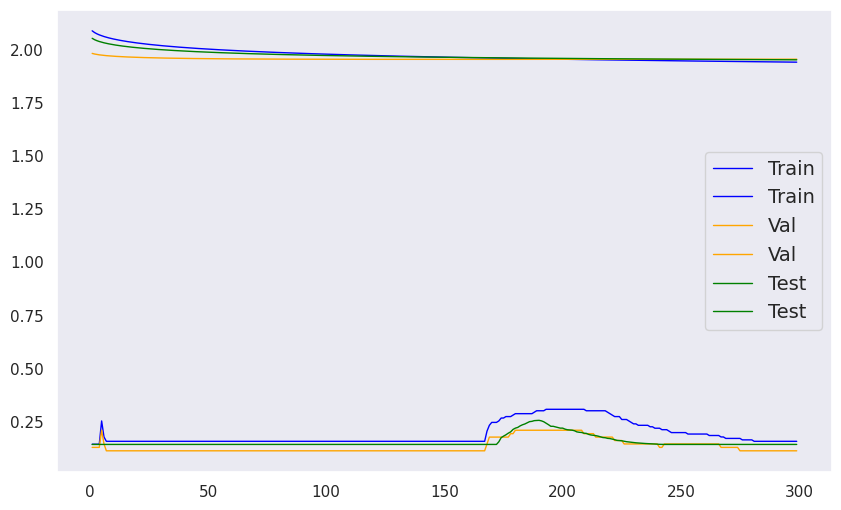

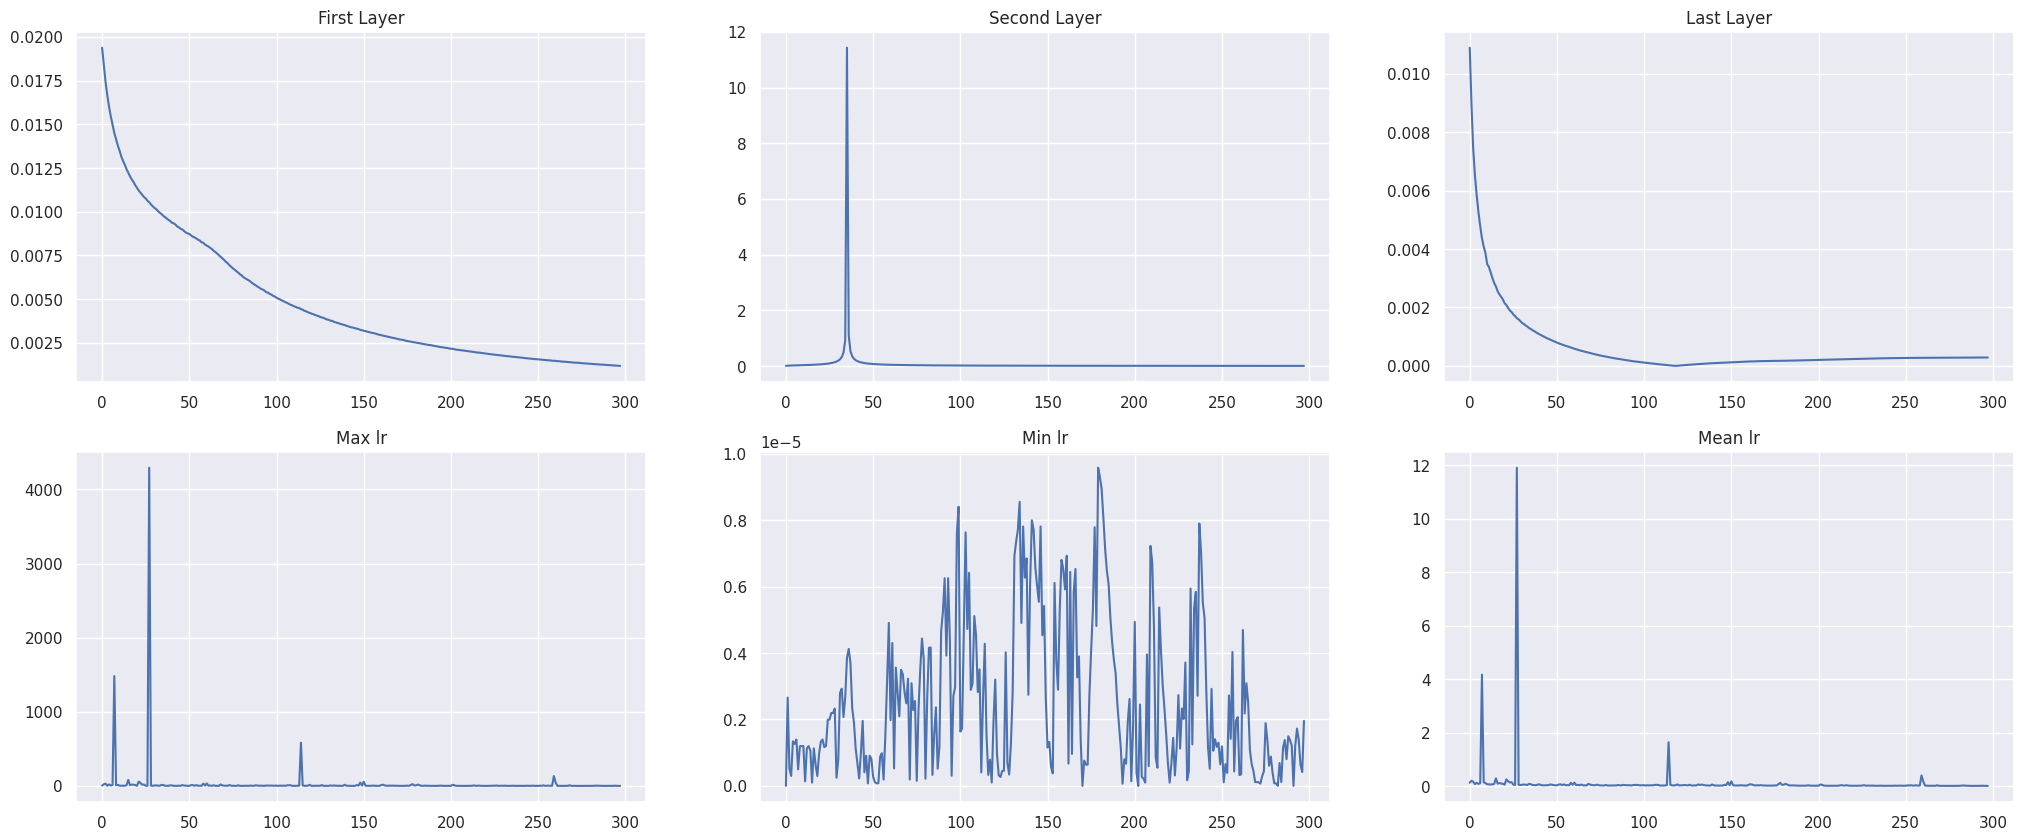

In [ ]:
weightsChanges = []

for i in range(amountOfEpochs - 2):
    weightsChanges.append([])
    for j in range(len(weightsHistory[i + 1])):
        weightsChanges[-1].append(abs((weightsHistory[i + 1][j] - weightsHistory[i][j])/weightsHistory[i][j]))

speed1 = []
speed2 = []
speed3 = []

max_speed = []
min_speed = []
mean_speed = []

for wc in weightsChanges:
    speed1.append(wc[0][3][1])
    speed2.append(wc[2][1][2])
    speed3.append(wc[4][4][0])

    max_ = wc[0][0][0]
    min_ = wc[0][0][0]
    sum_ = 0

    for j in wc:
        h = np.asarray(j)

        if max_ < h.max():
            max_ = h.max()
        if min_ > h.min():
            min_ = h.min()

        sum_ += h.sum()

    max_speed.append(max_)
    min_speed.append(min_)
    # 362 - number of parameters of NN
    mean_speed.append(sum_/362)


fig11, ax11 = plt.subplots()
fig11.set_size_inches((10, 6))

ax11.plot(errors_AdaGrad['Epoch'], np.array(errors_AdaGrad['Train']),      label='Train',      linewidth=1, color="blue")
ax11.plot(errors_AdaGrad['Epoch'], np.array(errors_AdaGrad['Validation']), label='Val',        linewidth=1, color="orange")
ax11.plot(errors_AdaGrad['Epoch'], np.array(errors_AdaGrad['Test']),       label='Test',       linewidth=1, color="green")
ax11.legend(fontsize=14)
ax11.grid()

train_loss = np.array(errors_AdaGrad['Train'])[-1]
test_loss = np.array(errors_AdaGrad['Test'])[-1]

print(f'Train loss: \t{train_loss}')
print(f'Test loss: \t{test_loss}\n')
# plt.savefig(f'./Graphs/AdaGrad_lr={lr}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_AdaGrad_1')
plt.show()

fig12, ax12 = plt.subplots(2, 3)
fig12.set_size_inches((25, 10))

ax12[0][0].plot(speed1);
ax12[0][0].title.set_text('First Layer')

ax12[0][1].plot(speed2);
ax12[0][1].title.set_text('Second Layer')

ax12[0][2].plot(speed3);
ax12[0][2].title.set_text('Last Layer')

ax12[1][0].plot(max_speed);
ax12[1][0].title.set_text('Max lr')

ax12[1][1].plot(min_speed);
ax12[1][1].title.set_text('Min lr')

ax12[1][2].plot(mean_speed);
ax12[1][2].title.set_text('Mean lr')

# plt.savefig('./Graphs/AdaGrad_learning_rate_1.png', dpi=300)
plt.show()

RMSProp

In [ ]:
rho = [
    0.0,
    0.5,
    0.9,
    0.975
]

amountOfEpochs = 100
lr = 0.1

errors_RMSProp = dict()
weightsHistoryRMSProp = dict()

for p in rho:
    errors_RMSProp[p] = {
        'Train':[],
        'Validation':[],
        'Test': [],
        'Epoch':[]
    }

    model.load_weights('./weights/weight_1')

    model = keras.Model(inputs=inputLayer, outputs=outputLayer)

    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(
            lr=lr,
            rho=p
        ),
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy']
    )

    currentEpoch = 1
    weightsHistoryRMSProp[p] = []

    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x,
            y              =train_y,
            epochs         =1,
            validation_data=(_data_validation_x, validation_y),
            batch_size=batch_size,
            verbose=0
        )

        weightsHistoryRMSProp[p].append(model.get_weights())

        errors_RMSProp[p]['Train'     ].append(model.evaluate(_data_train_x, train_y, batch_size=batch_size, verbose=0))
        errors_RMSProp[p]['Validation'].append(model.evaluate(_data_validation_x, validation_y, batch_size=batch_size, verbose=0))
        errors_RMSProp[p]['Test'      ].append(model.evaluate(_data_test_x, test_y, batch_size=batch_size, verbose=0))
        errors_RMSProp[p]['Epoch'     ].append(currentEpoch)

        currentEpoch += 1

Train loss: 	[1.80673373 0.32800001]
Test loss: 	[2.42684412 0.13636364]

Train loss: 	[0.75073224 0.69599998]
Test loss: 	[1.08532751 0.59090906]

Train loss: 	[0.2345338  0.94400001]
Test loss: 	[0.94189364 0.77272725]

Train loss: 	[0.10486894 0.97600001]
Test loss: 	[1.03762424 0.77272725]



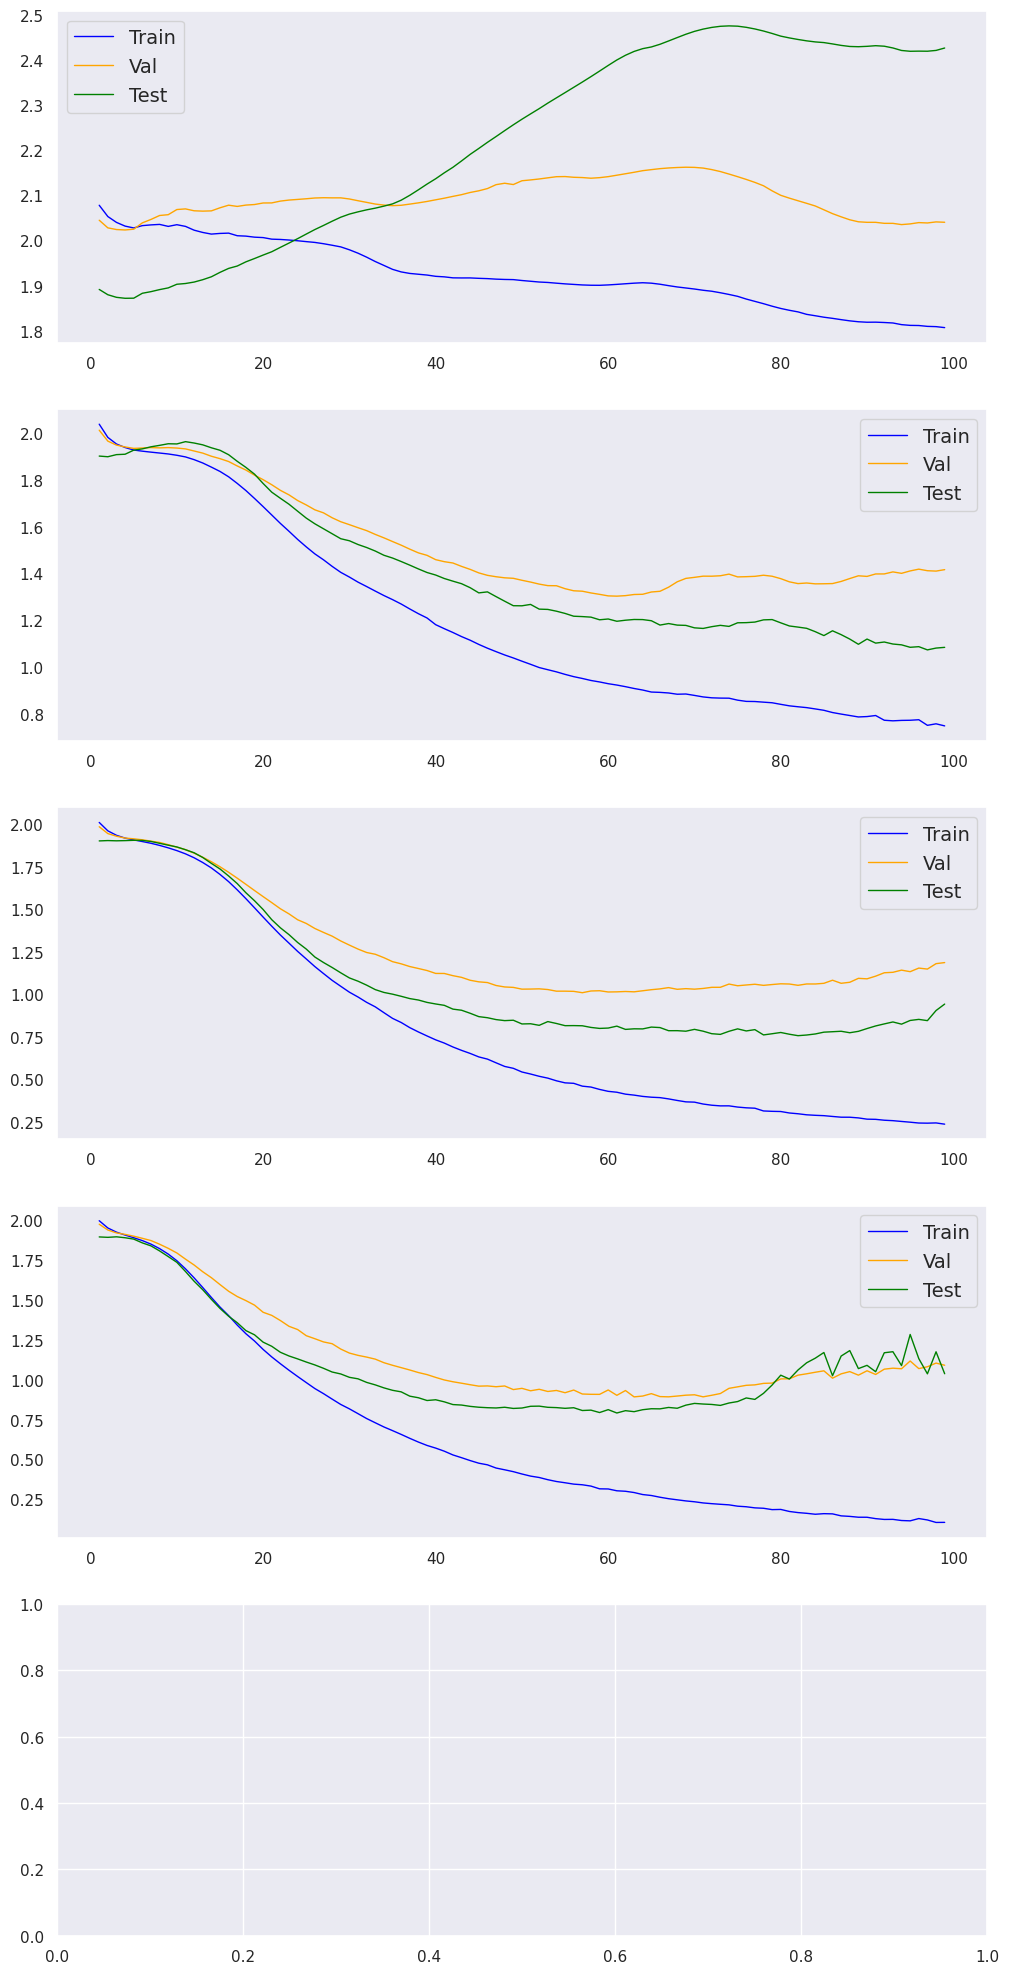

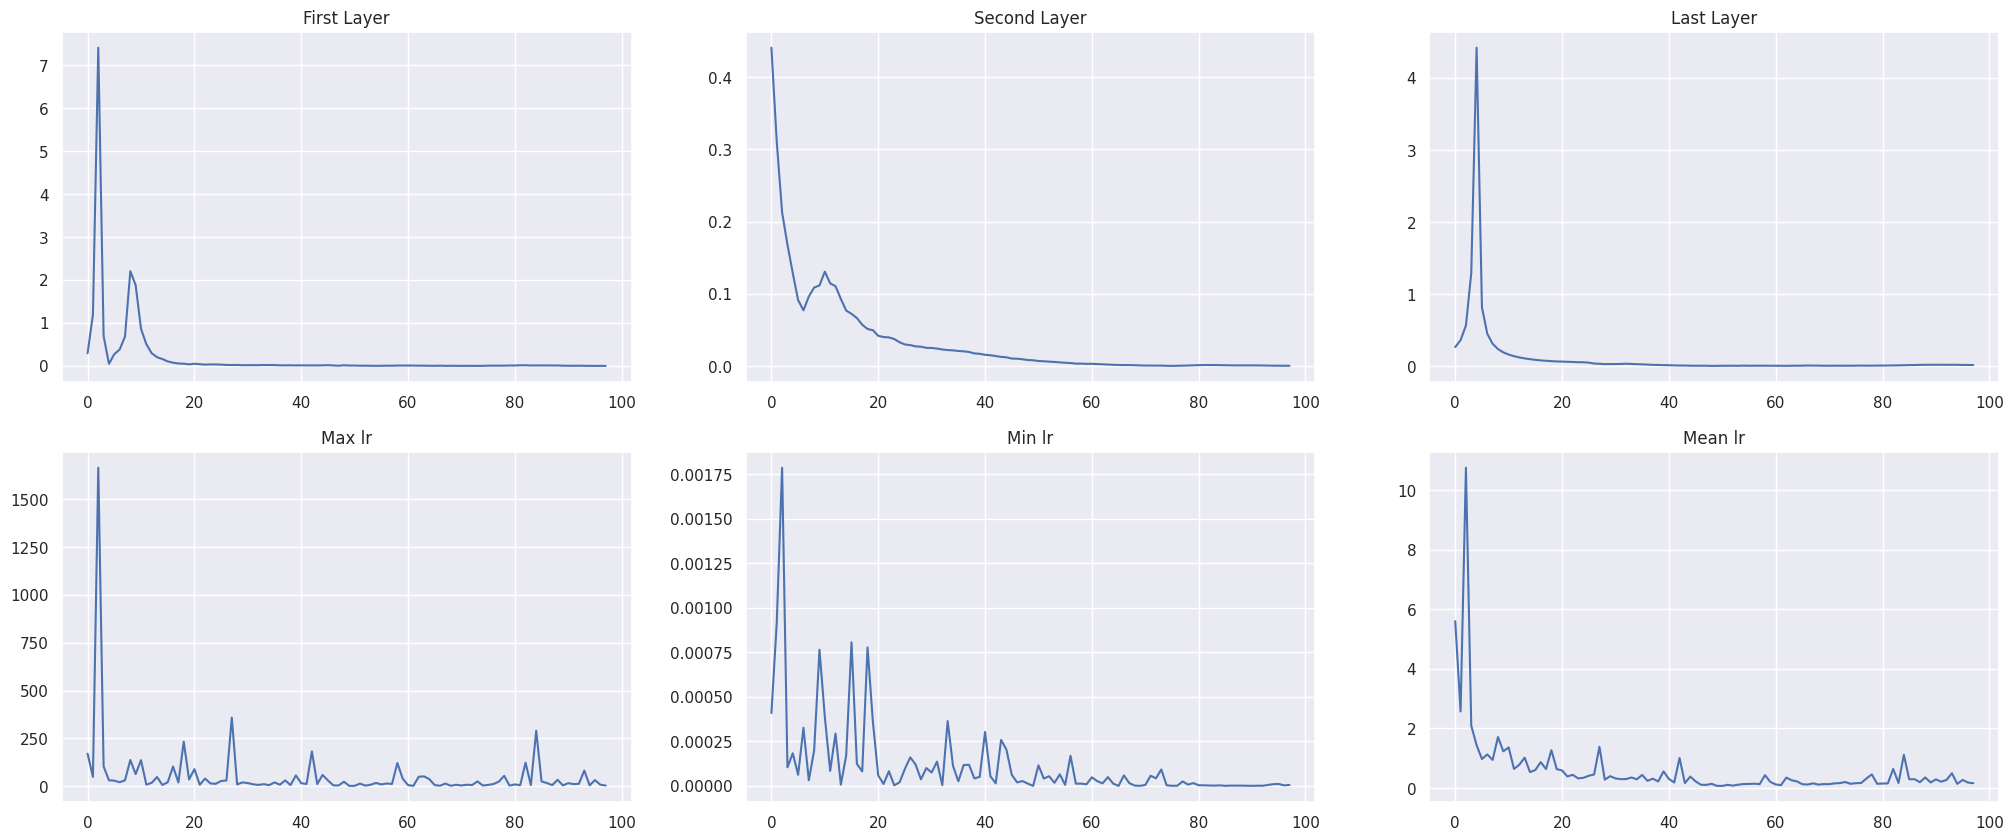

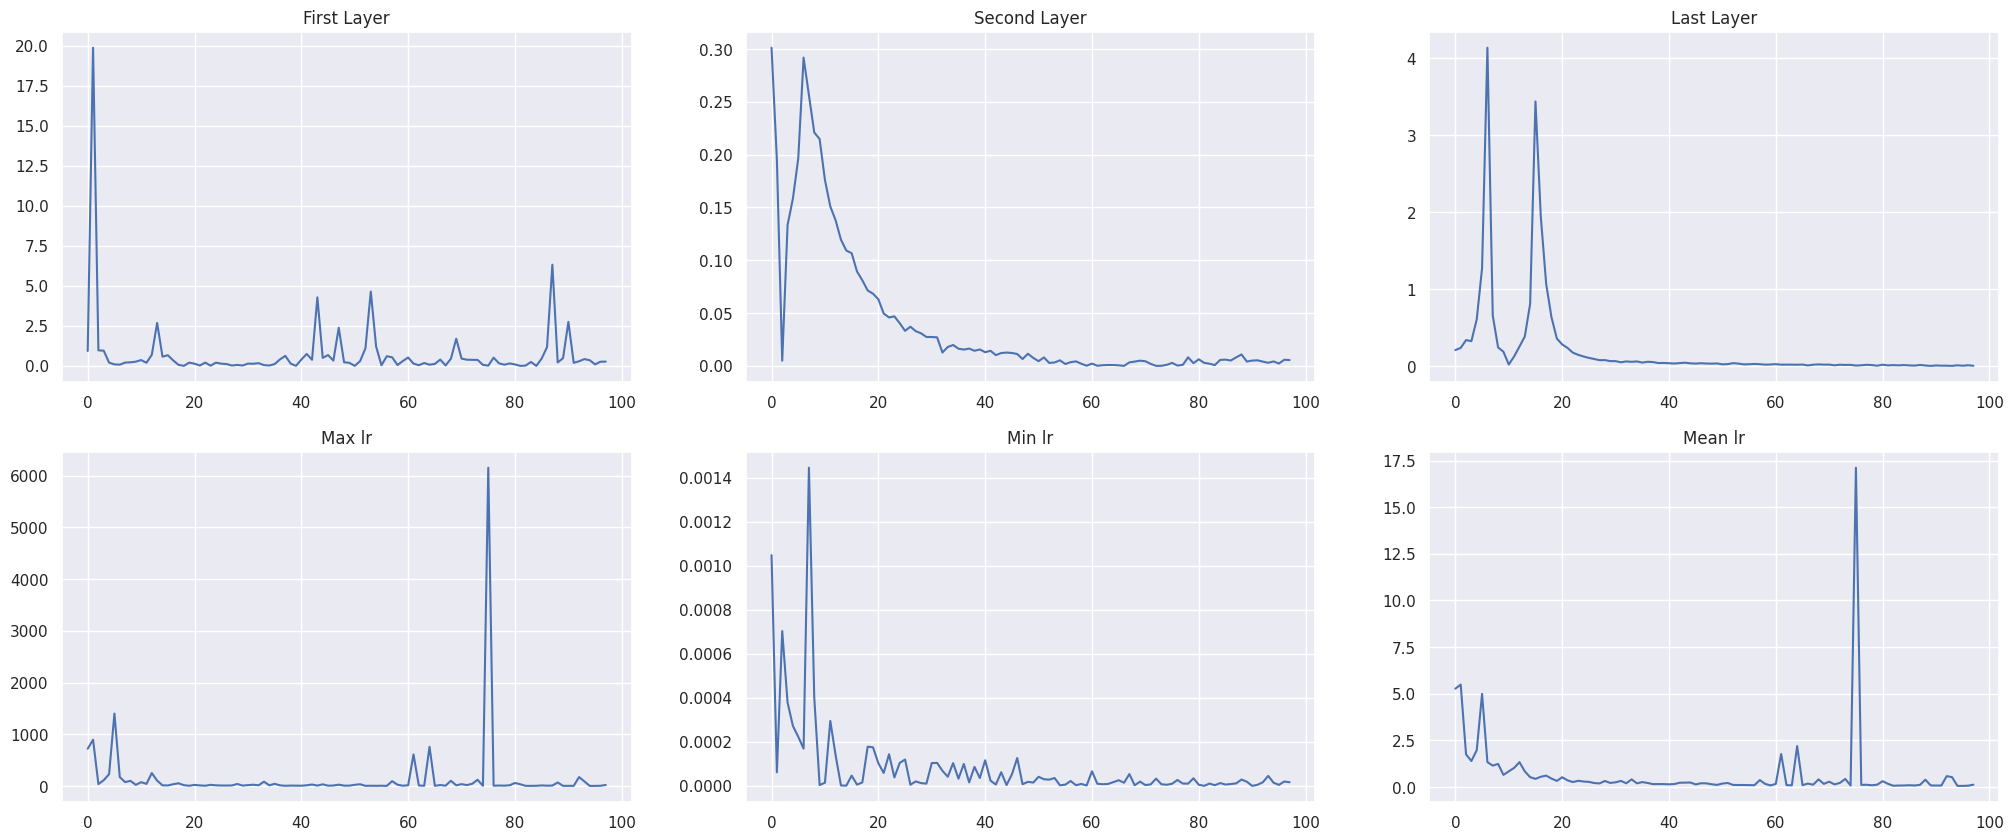

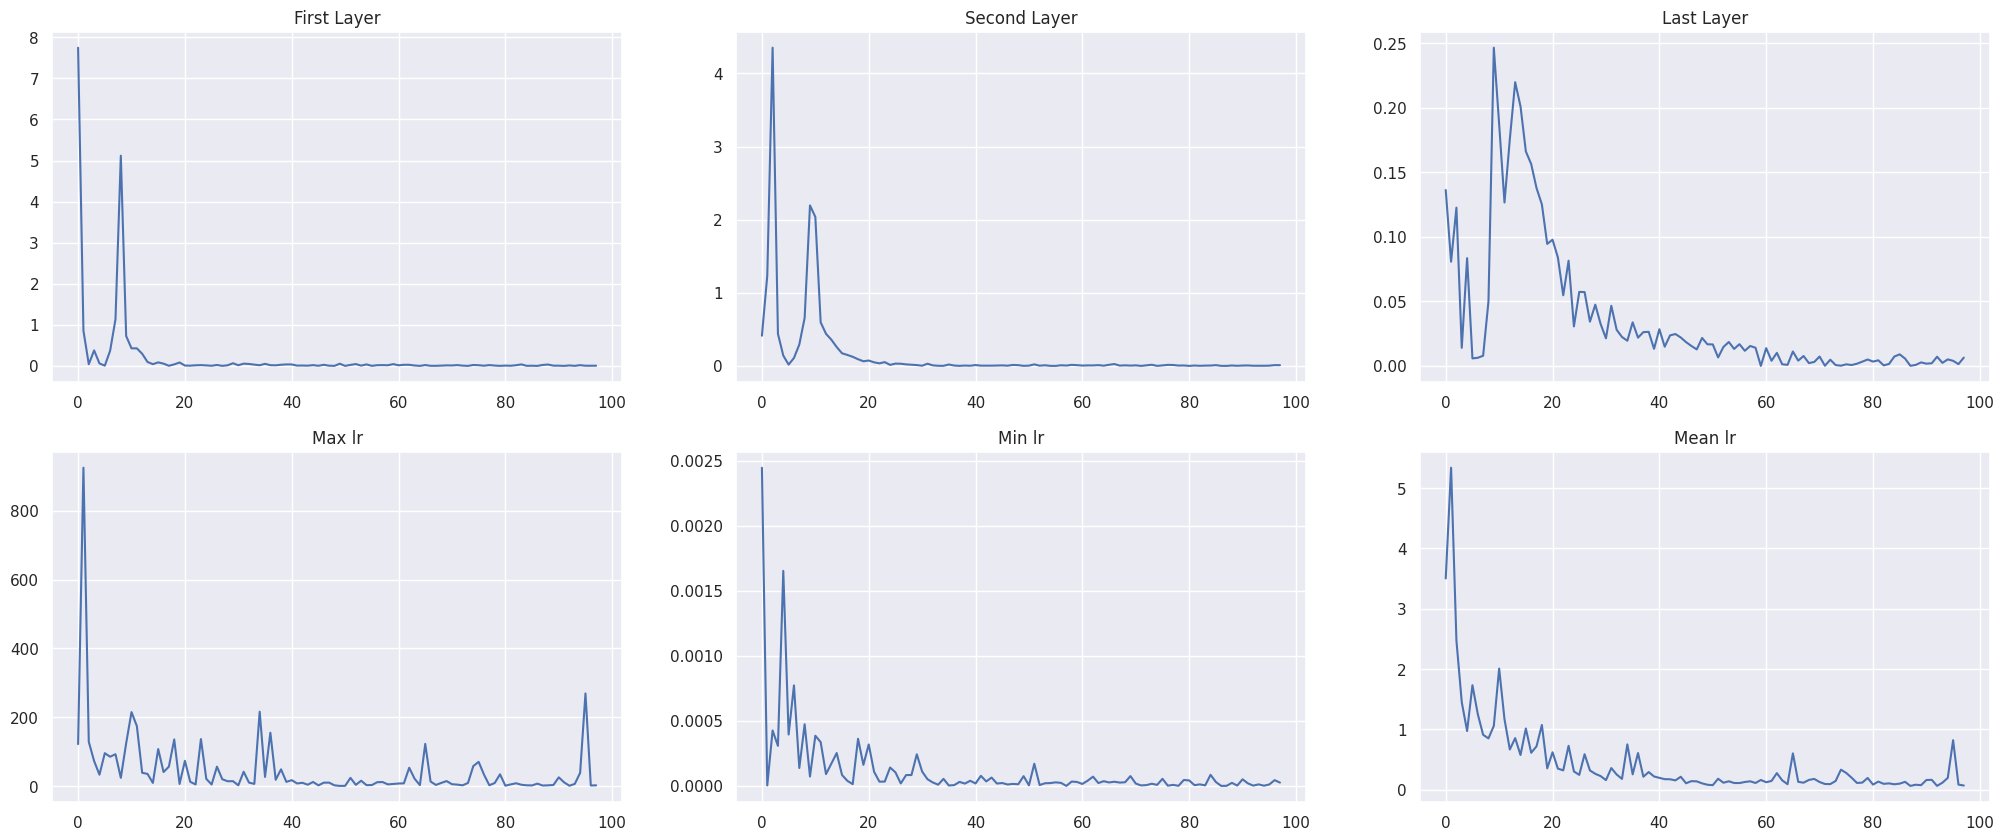

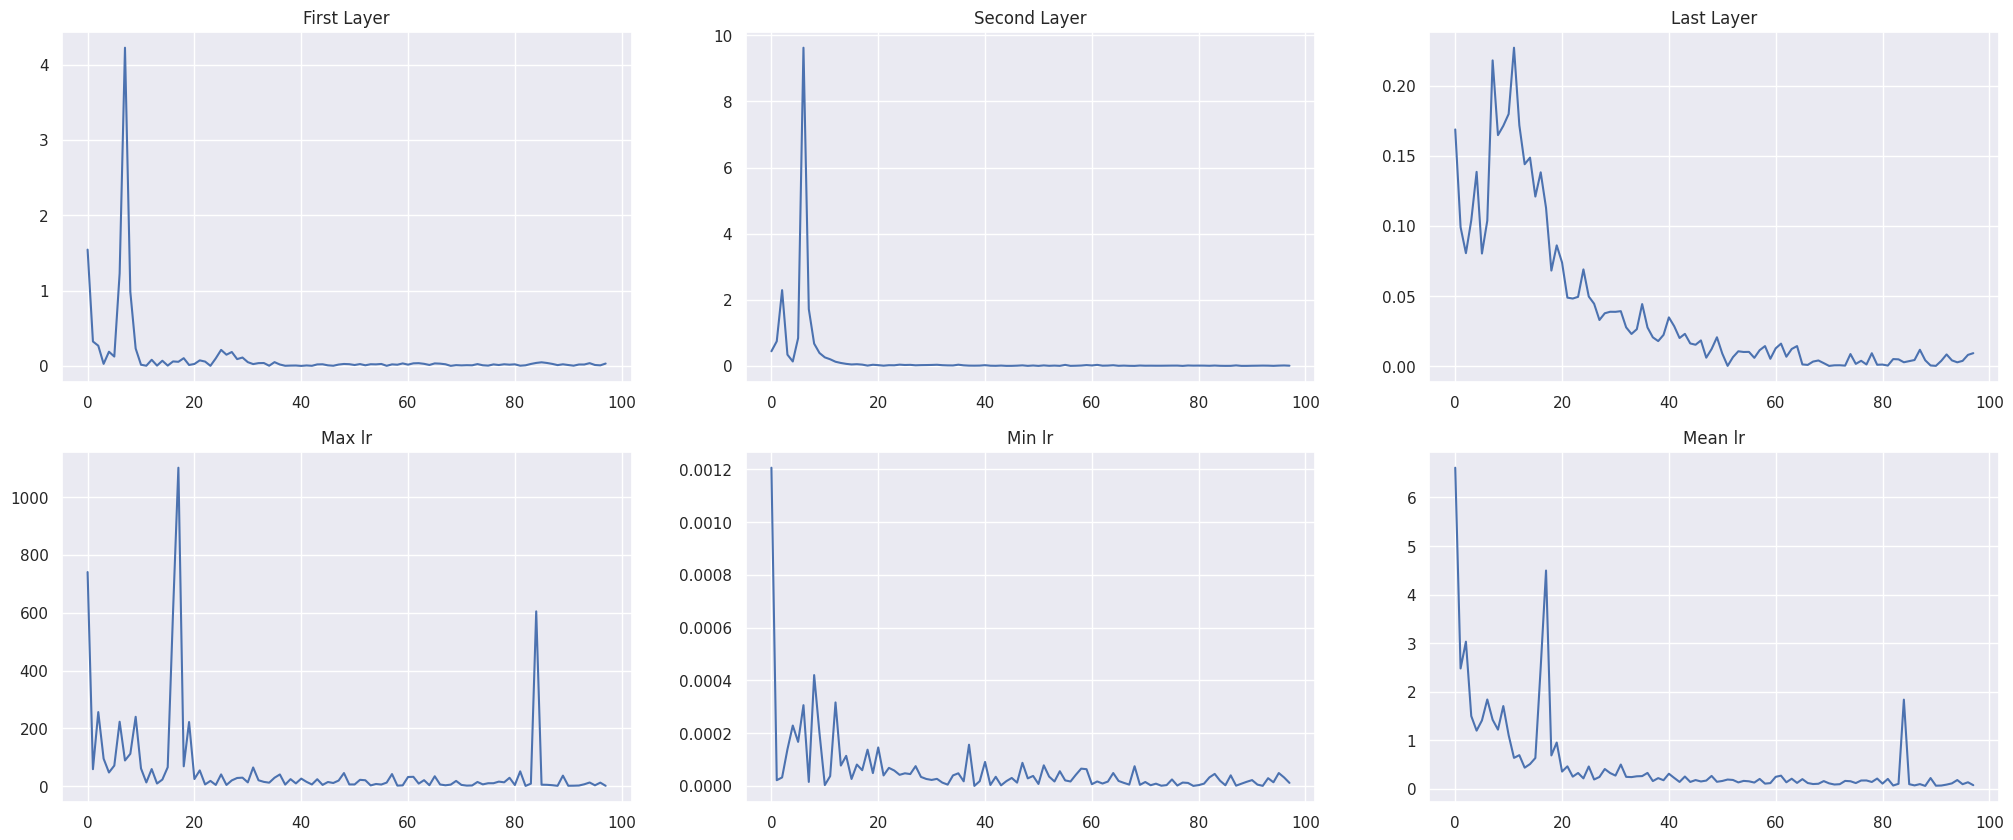

In [ ]:
fig16, ax16 = plt.subplots(5, 1)
fig16.set_size_inches((12, 25))

for i in range(len(rho)):
    ax16[i].plot(errors_RMSProp[rho[i]]['Epoch'], np.array(errors_RMSProp[rho[i]]['Train'])[:, 0],      label='Train',      linewidth=1, color="blue")
    ax16[i].plot(errors_RMSProp[rho[i]]['Epoch'], np.array(errors_RMSProp[rho[i]]['Validation'])[:, 0], label='Val',        linewidth=1, color="orange")
    ax16[i].plot(errors_RMSProp[rho[i]]['Epoch'], np.array(errors_RMSProp[rho[i]]['Test'])[:, 0],       label='Test',       linewidth=1, color="green")
    ax16[i].legend(fontsize=14)
    ax16[i].grid()
    train_loss = np.array(errors_RMSProp[rho[i]]['Train'])[-1]
    test_loss = np.array(errors_RMSProp[rho[i]]['Test'])[-1]
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

# plt.savefig(f'./Graphs/RMSProp_lr={lr}_momentrum={rho[i]}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_RMSProp_1')



for k in range(len(rho)):
    weightsChangesRMSProp = []

    for i in range(amountOfEpochs - 2):
        weightsChangesRMSProp.append([])
        for j in range(len(weightsHistoryRMSProp[rho[k]][i + 1])):
            weightsChangesRMSProp[-1].append(abs((weightsHistoryRMSProp[rho[k]][i + 1][j] - weightsHistoryRMSProp[rho[k]][i][j])/weightsHistoryRMSProp[rho[k]][i][j]))

    speed1 = []
    speed2 = []
    speed3 = []

    max_speed = []
    min_speed = []
    mean_speed = []

    for wc in weightsChangesRMSProp:
        speed1.append(wc[0][3][1])
        speed2.append(wc[2][1][2])
        speed3.append(wc[4][4][0])

        max_ = wc[0][0][0]
        min_ = wc[0][0][0]
        sum_ = 0

        for j in wc:
            h = np.asarray(j)

            if max_ < h.max():
                max_ = h.max()
            if min_ > h.min():
                min_ = h.min()

            sum_ += h.sum()

        max_speed.append(max_)
        min_speed.append(min_)
        # 362 - number of parameters of NN
        mean_speed.append(sum_/362)

    fig17, ax17 = plt.subplots(2, 3)
    fig17.set_size_inches((25, 10))

    ax17[0][0].plot(speed1);
    ax17[0][0].title.set_text('First Layer')

    ax17[0][1].plot(speed2);
    ax17[0][1].title.set_text('Second Layer')

    ax17[0][2].plot(speed3);
    ax17[0][2].title.set_text('Last Layer')

    ax17[1][0].plot(max_speed);
    ax17[1][0].title.set_text('Max lr')

    ax17[1][1].plot(min_speed);
    ax17[1][1].title.set_text('Min lr')

    ax17[1][2].plot(mean_speed);
    ax17[1][2].title.set_text('Mean lr')

    # plt.savefig(f'./Graphs/RMSProp_learning_rate_p={rho[k]}.png', dpi=300)
    plt.show()

Adadelta

In [ ]:
rho = [
    0.0,
    0.5,
    0.9,
    0.975
]

amountOfEpochs = 100
lr = 0.1

errors_AdaDelta = dict()
weightsHistoryAdadelta = dict()

for p in rho:
    errors_AdaDelta[p] = {
        'Train':[],
        'Validation':[],
        'Test': [],
        'Epoch':[]
    }

    model.load_weights('./weights/weight_1')

    model = keras.Model(inputs=inputLayer, outputs=outputLayer)

    model.compile(
        optimizer=tf.keras.optimizers.Adadelta(
            lr=lr,
            rho=p
        ),
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy']
    )

    currentEpoch = 1
    weightsHistoryAdadelta[p] = []

    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x,
            y              =train_y,
            epochs         =1,
            validation_data=(_data_validation_x, validation_y),
            batch_size=1,
            verbose=0
        )

        weightsHistoryAdadelta[p].append(model.get_weights())

        errors_AdaDelta[p]['Train'     ].append(model.evaluate(_data_train_x, train_y, batch_size=batch_size, verbose=0))
        errors_AdaDelta[p]['Validation'].append(model.evaluate(_data_validation_x, validation_y, batch_size=batch_size, verbose=0))
        errors_AdaDelta[p]['Test'      ].append(model.evaluate(_data_test_x, test_y, batch_size=batch_size, verbose=0))
        errors_AdaDelta[p]['Epoch'     ].append(currentEpoch)

        currentEpoch += 1

Train loss: 	[2.04976106 0.12800001]
Test loss: 	[1.8904556  0.31818181]

Train loss: 	[2.10478377 0.12800001]
Test loss: 	[1.90331304 0.31818181]

Train loss: 	[2.10034347 0.12800001]
Test loss: 	[1.90332294 0.31818181]

Train loss: 	[2.090343   0.12800001]
Test loss: 	[1.90357792 0.31818181]



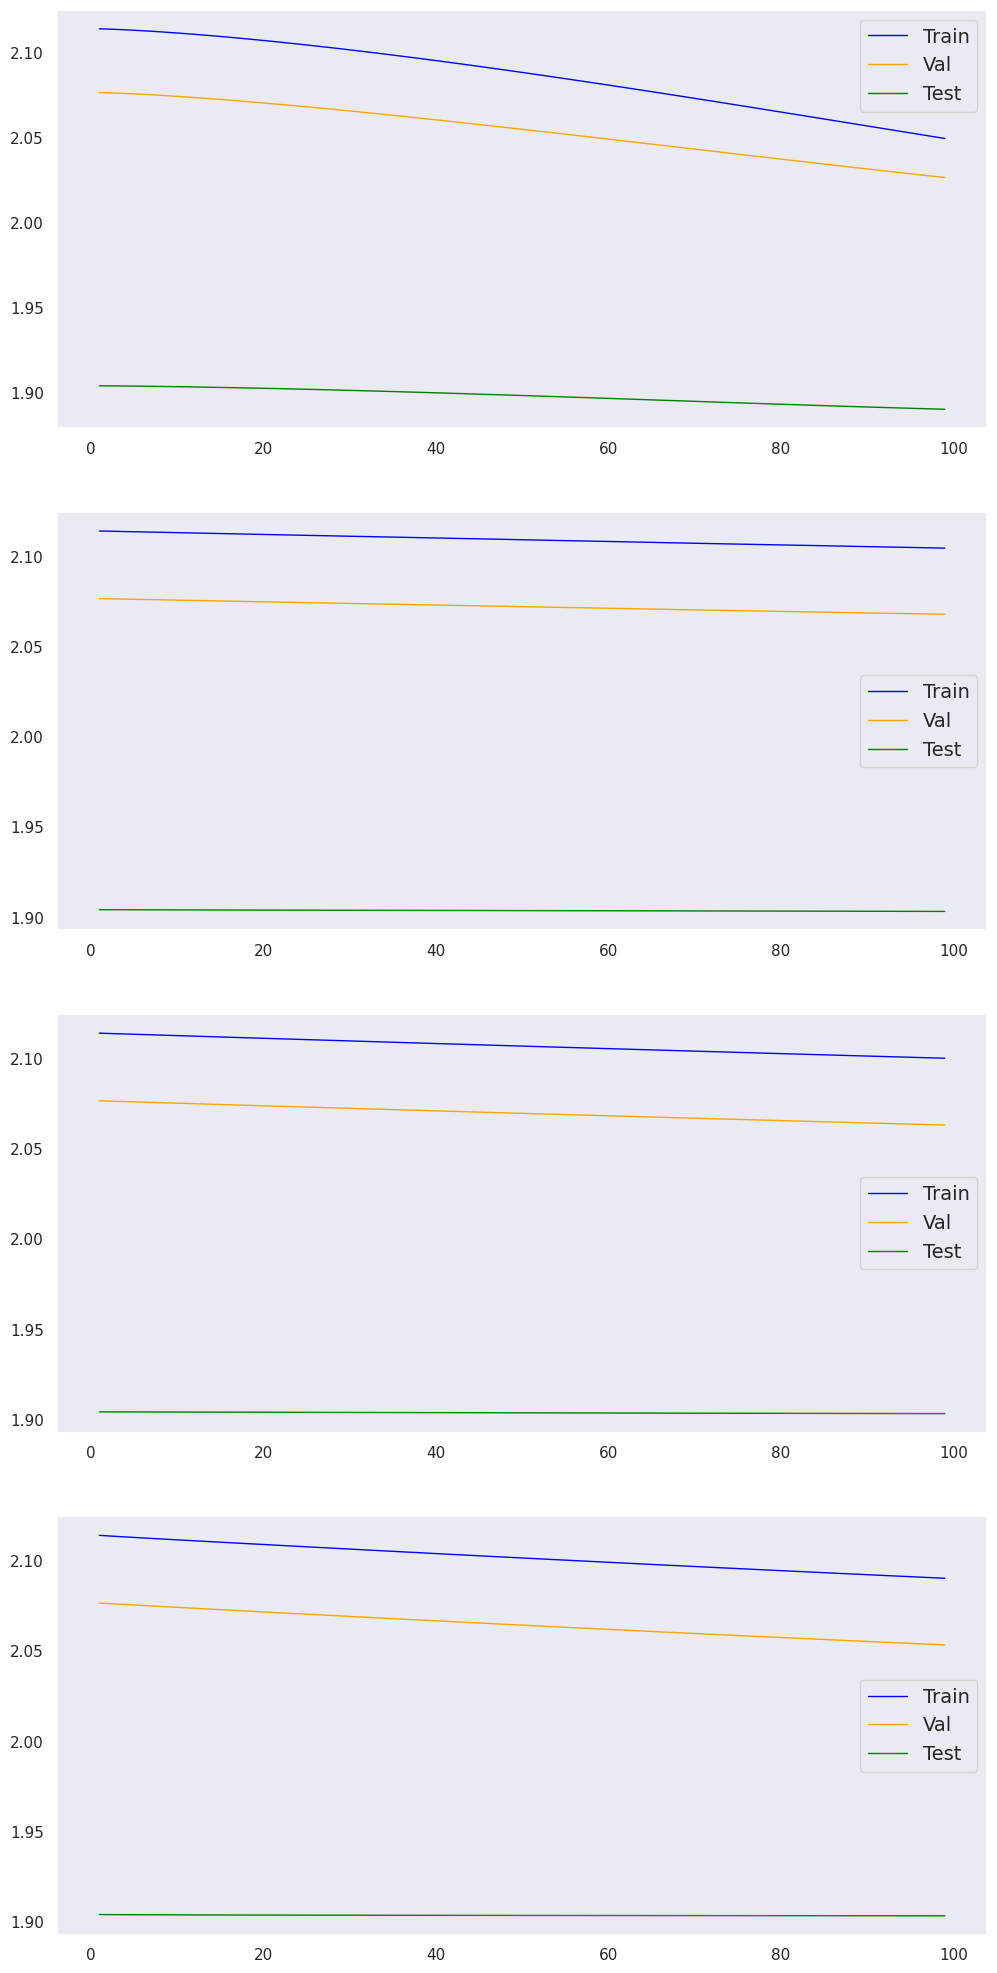

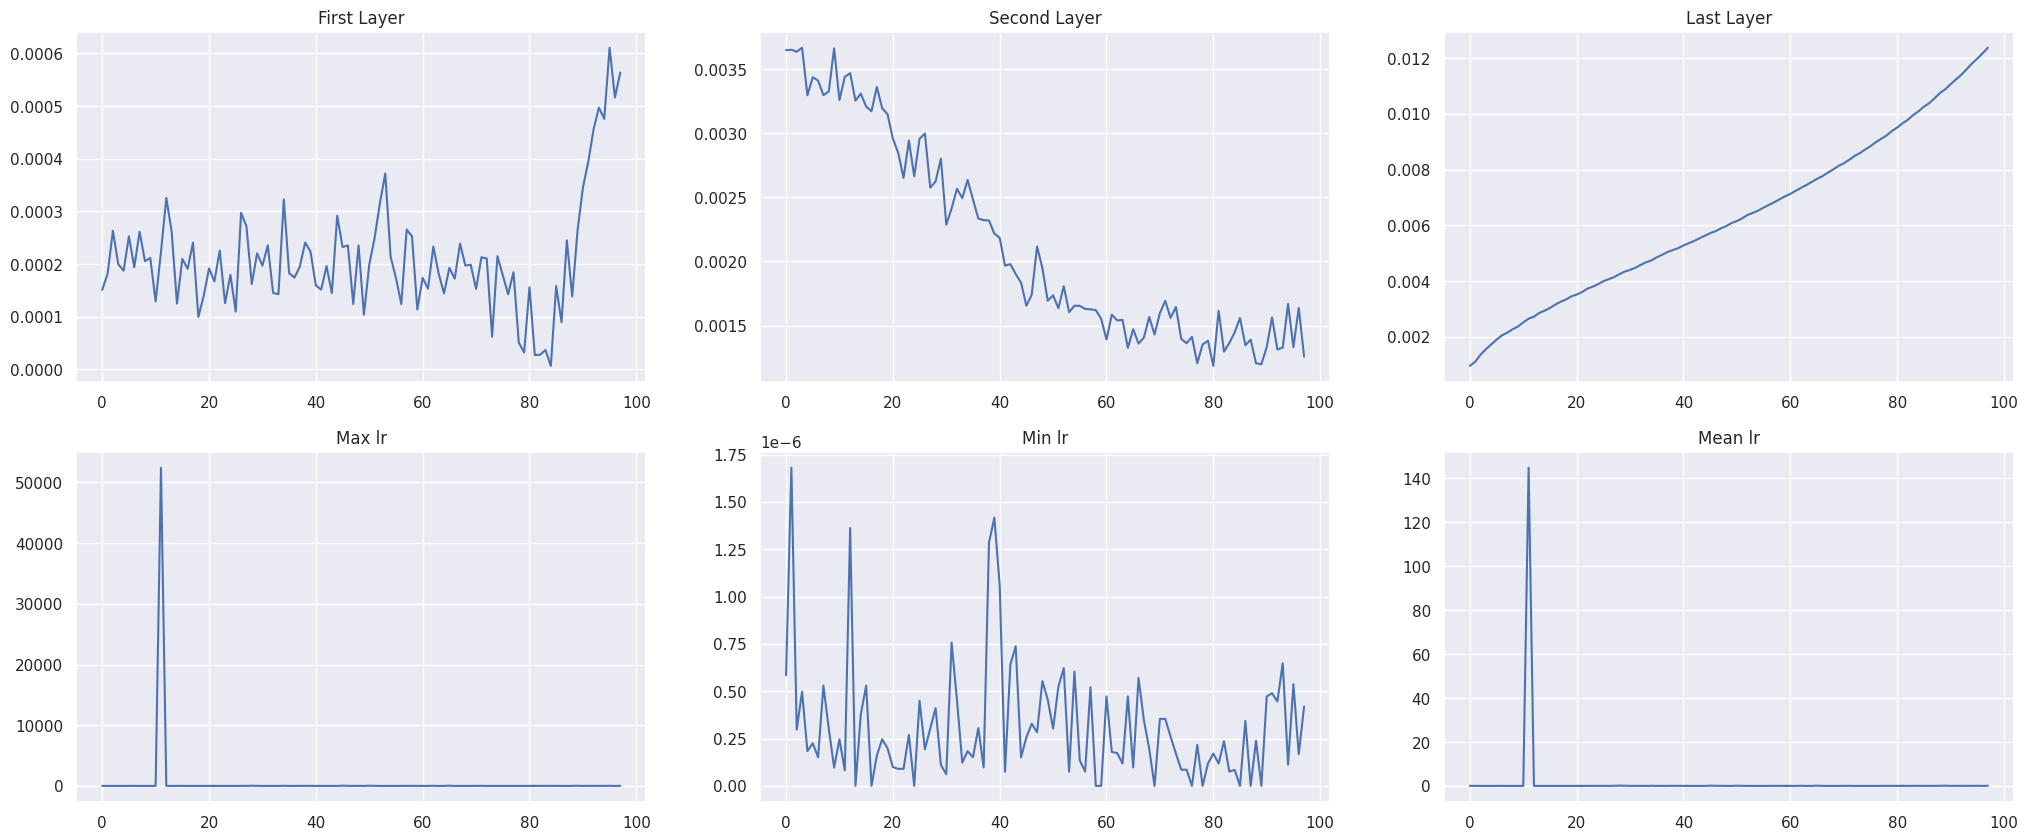

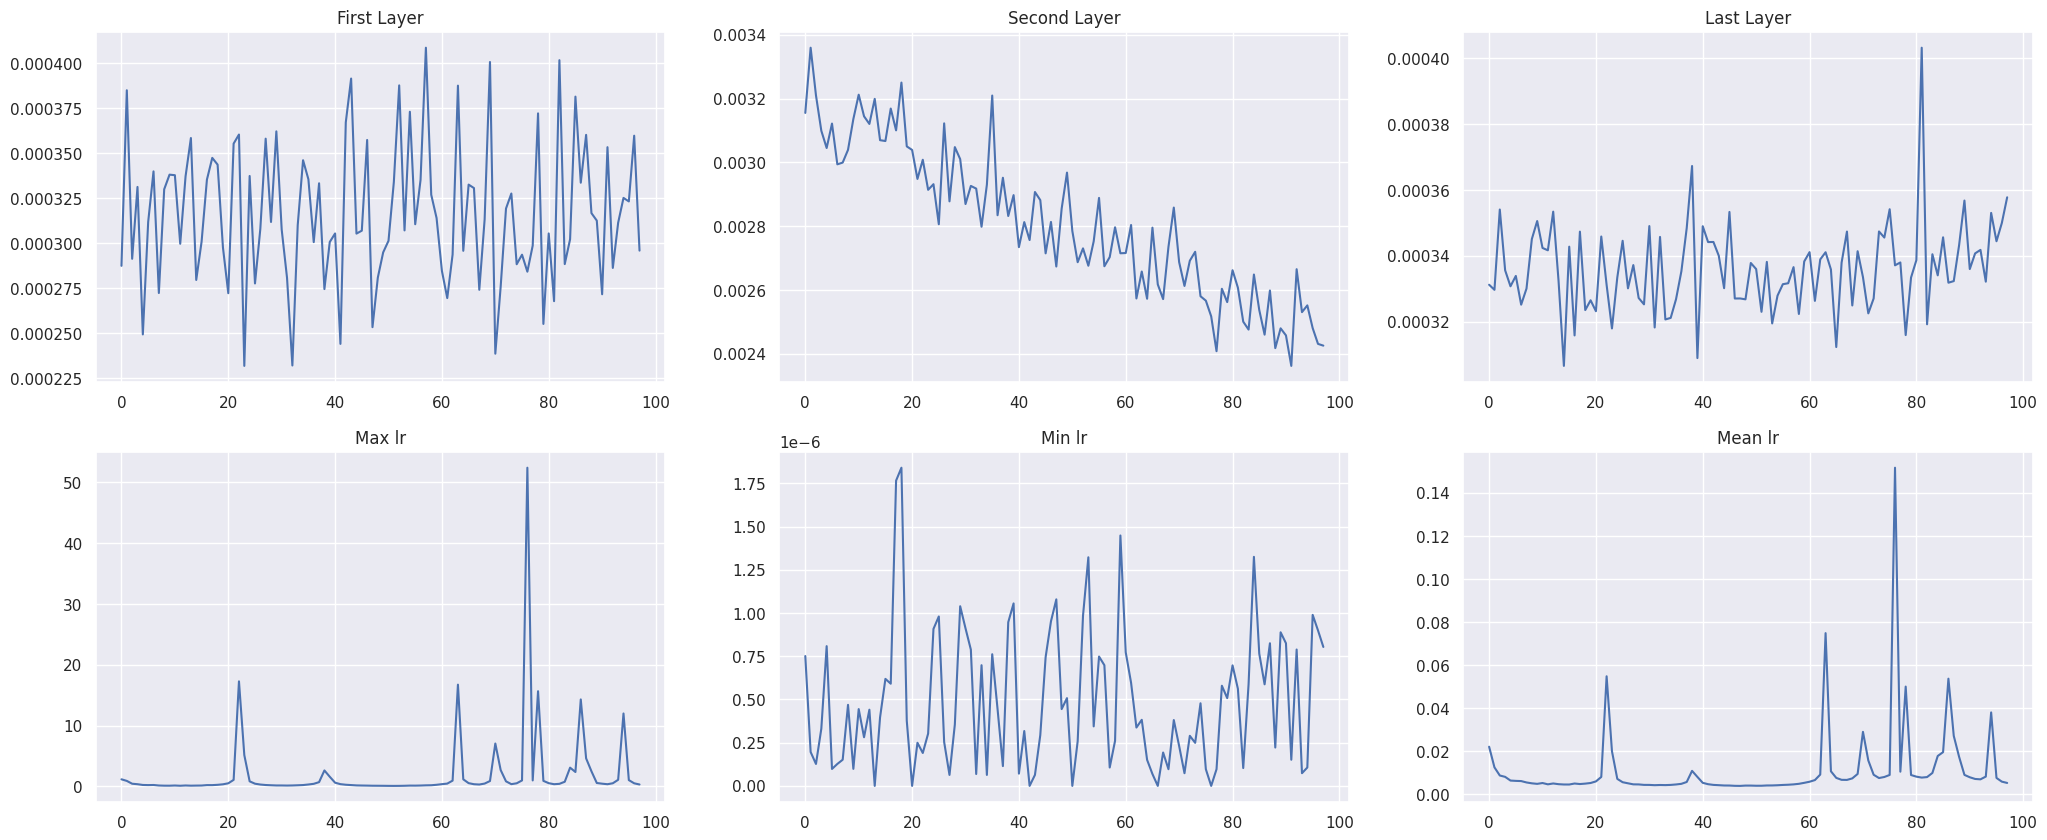

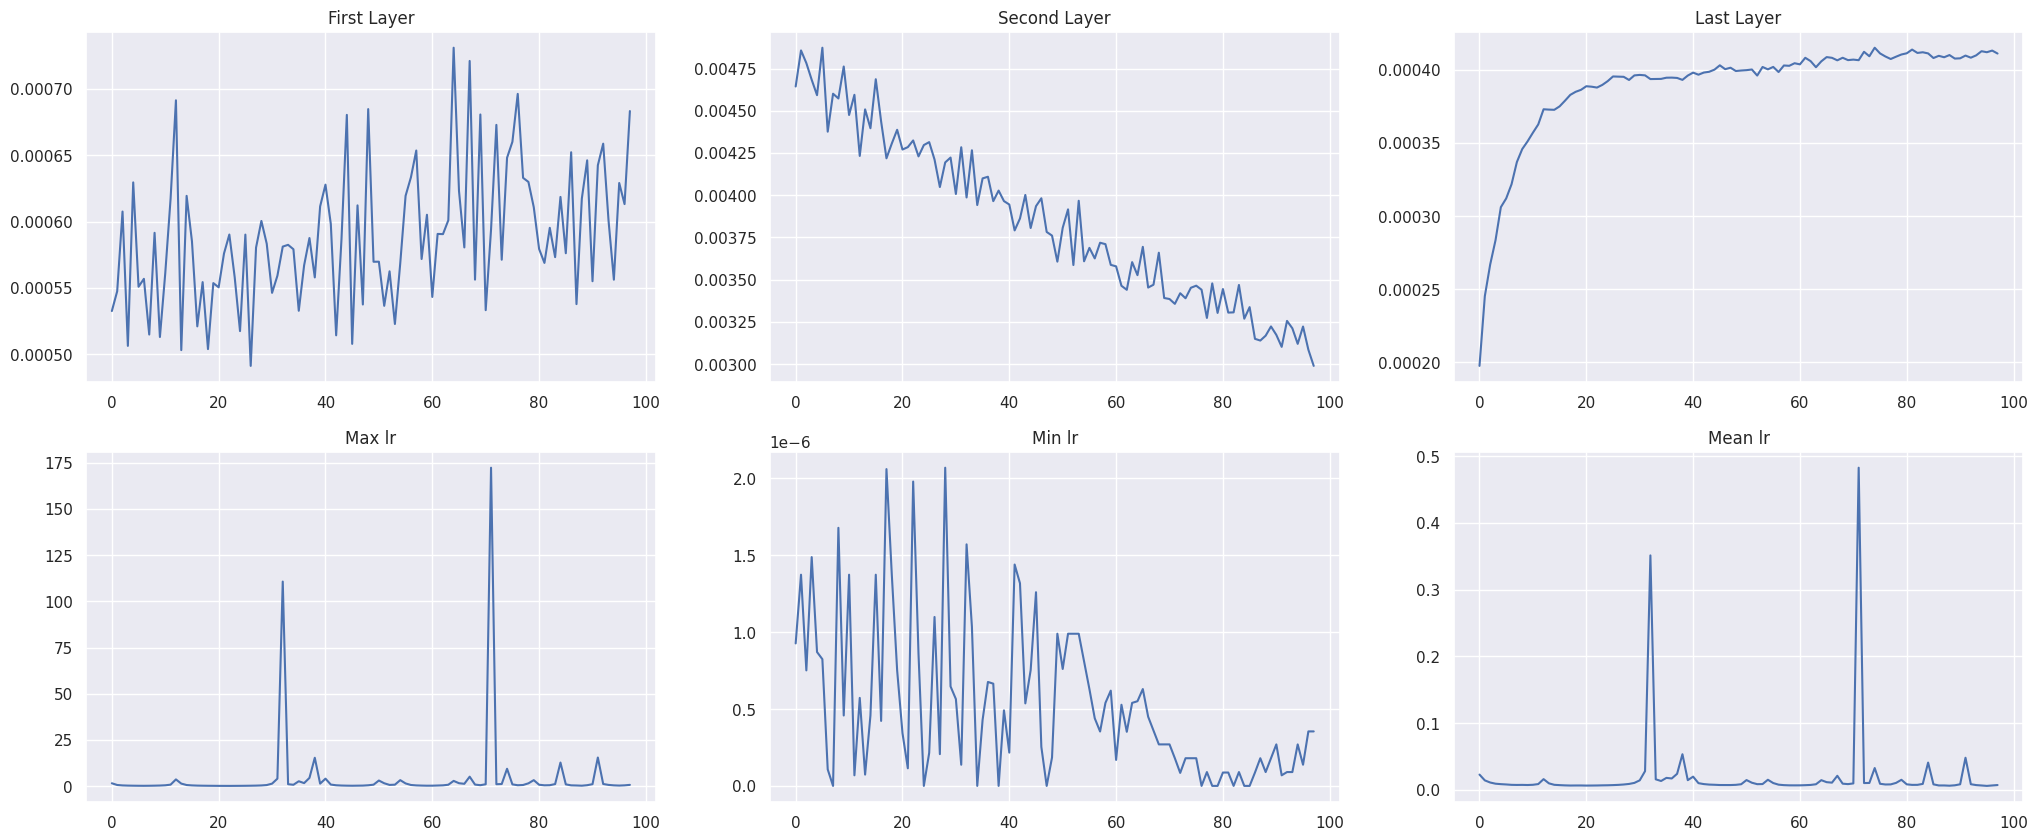

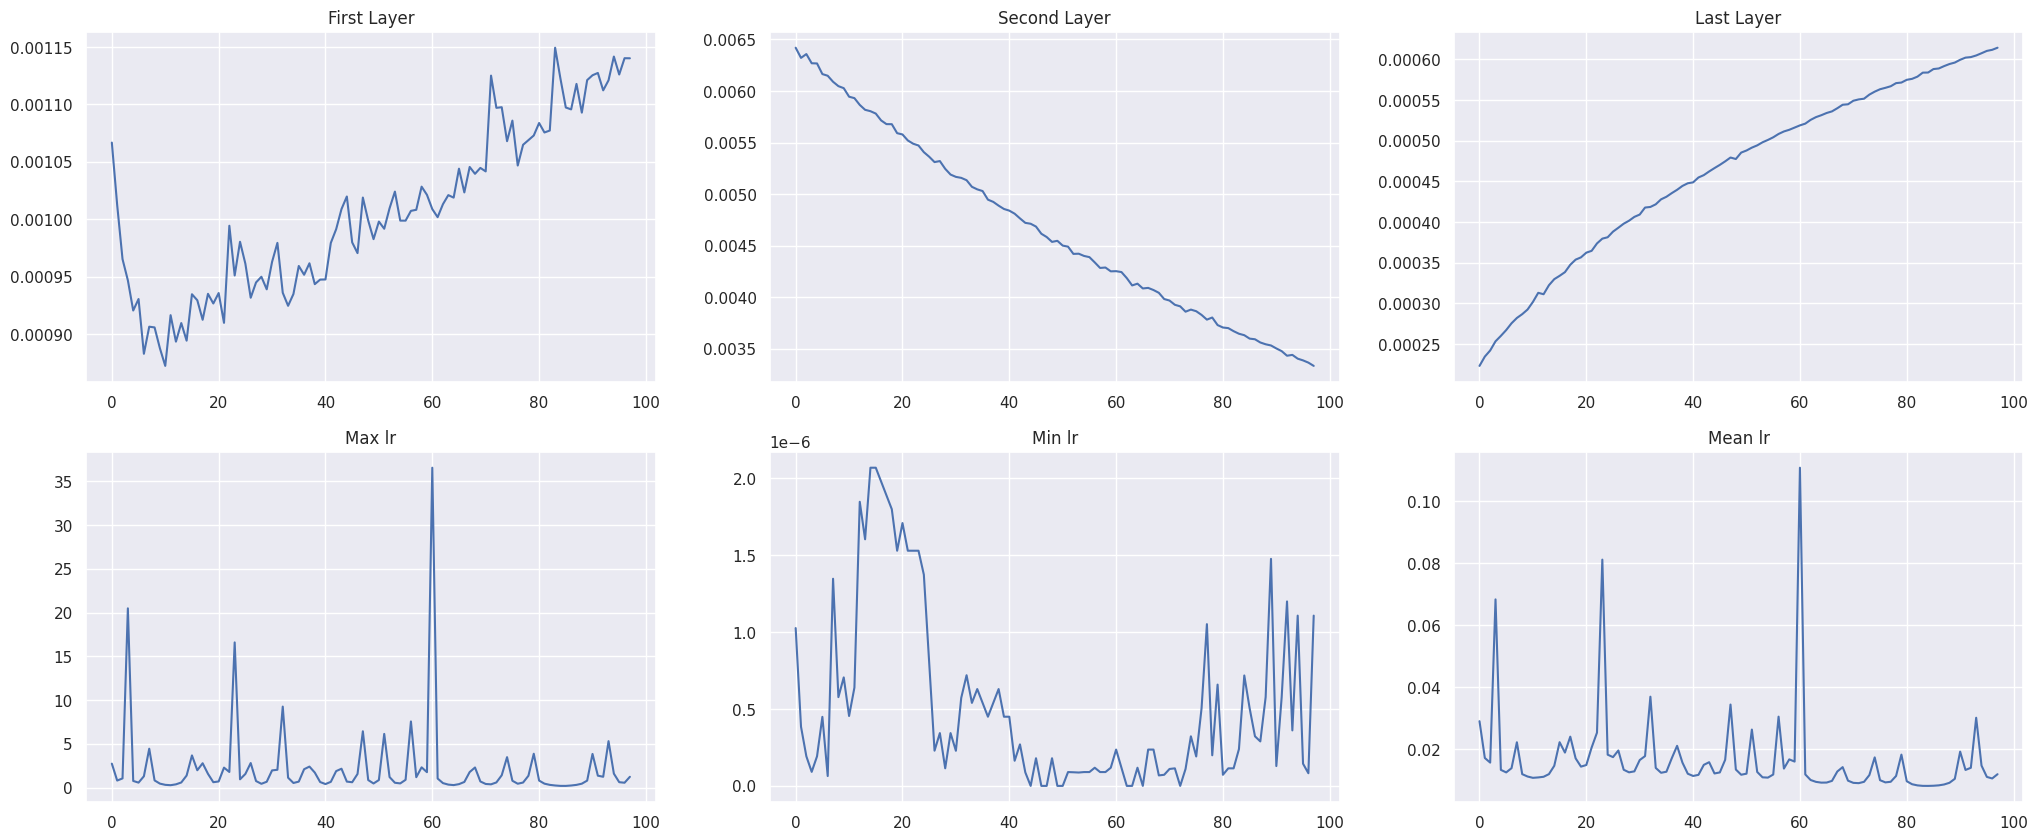

In [ ]:
fig13, ax13 = plt.subplots(len(rho), 1)
fig13.set_size_inches((12, 25))

for i in range(len(rho)):
    ax13[i].plot(errors_AdaDelta[rho[i]]['Epoch'], np.array(errors_AdaDelta[rho[i]]['Train'])[:, 0],      label='Train',      linewidth=1, color="blue")
    ax13[i].plot(errors_AdaDelta[rho[i]]['Epoch'], np.array(errors_AdaDelta[rho[i]]['Validation'])[:, 0], label='Val',        linewidth=1, color="orange")
    ax13[i].plot(errors_AdaDelta[rho[i]]['Epoch'], np.array(errors_AdaDelta[rho[i]]['Test'])[:, 0],       label='Test',       linewidth=1, color="green")
    ax13[i].legend(fontsize=14)
    ax13[i].grid()
    train_loss = np.array(errors_AdaDelta[rho[i]]['Train'])[-1]
    test_loss = np.array(errors_AdaDelta[rho[i]]['Test'])[-1]
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

model.save_weights('./weights/weight_Adadelta_1')

for k in range(len(rho)):
    weightsChangesAdadelta = []

    for i in range(amountOfEpochs - 2):
        weightsChangesAdadelta.append([])
        for j in range(len(weightsHistoryAdadelta[rho[k]][i + 1])):
            weightsChangesAdadelta[-1].append(abs((weightsHistoryAdadelta[rho[k]][i + 1][j] - weightsHistoryAdadelta[rho[k]][i][j])/weightsHistoryAdadelta[rho[k]][i][j]))

    speed1 = []
    speed2 = []
    speed3 = []

    max_speed = []
    min_speed = []
    mean_speed = []

    for wc in weightsChangesAdadelta:
        speed1.append(wc[0][3][1])
        speed2.append(wc[2][1][2])
        speed3.append(wc[4][4][0])

        max_ = wc[0][0][0]
        min_ = wc[0][0][0]
        sum_ = 0

        for j in wc:
            h = np.asarray(j)

            if max_ < h.max():
                max_ = h.max()
            if min_ > h.min():
                min_ = h.min()

            sum_ += h.sum()

        max_speed.append(max_)
        min_speed.append(min_)
        mean_speed.append(sum_/362)

    fig15, ax15 = plt.subplots(2, 3)
    fig15.set_size_inches((25, 10))

    ax15[0][0].plot(speed1);
    ax15[0][0].title.set_text('First Layer')

    ax15[0][1].plot(speed2);
    ax15[0][1].title.set_text('Second Layer')

    ax15[0][2].plot(speed3);
    ax15[0][2].title.set_text('Last Layer')

    ax15[1][0].plot(max_speed);
    ax15[1][0].title.set_text('Max lr')

    ax15[1][1].plot(min_speed);
    ax15[1][1].title.set_text('Min lr')

    ax15[1][2].plot(mean_speed);
    ax15[1][2].title.set_text('Mean lr')

    plt.show()

Adam

In [ ]:
betas = [
    (0.0, 0.5),
    (0.5, 0.5),
    (0.5, 0.7),
    # (0.9, 0.9),
    (0.9, 0.975)
]

amountOfEpochs = 50
lr = 0.001

errors_Adam = dict()
weightsHistoryAdam = dict()

for p in betas:
    errors_Adam[p] = {
        'Train':[],
        'Validation':[],
        'Test': [],
        'Epoch':[]
    }

    model.load_weights('./weights/weight_1')

    model = keras.Model(inputs=inputLayer, outputs=outputLayer)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            lr=lr,
            beta_1=p[0],
            beta_2=p[1]
        ),
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy']
    )

    currentEpoch = 1
    weightsHistoryAdam[p] = []

    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x,
            y              =train_y,
            epochs         =1,
            validation_data=(_data_validation_x, validation_y),
            batch_size=batch_size,
            verbose=0
        )

        weightsHistoryAdam[p].append(model.get_weights())

        errors_Adam[p]['Train'     ].append(model.evaluate(_data_train_x, train_y, batch_size=batch_size, verbose=0))
        errors_Adam[p]['Validation'].append(model.evaluate(_data_validation_x, validation_y, batch_size=batch_size, verbose=0))
        errors_Adam[p]['Test'      ].append(model.evaluate(_data_test_x, test_y, batch_size=batch_size, verbose=0))
        errors_Adam[p]['Epoch'     ].append(currentEpoch)

        currentEpoch += 1

Train loss: 	[1.0075835  0.65600002]
Test loss: 	[1.17075753 0.59090906]

Train loss: 	[0.85257894 0.68800002]
Test loss: 	[1.2403537  0.54545456]

Train loss: 	[0.71468347 0.77600002]
Test loss: 	[1.02618814 0.59090906]

Train loss: 	[0.44973367 0.912     ]
Test loss: 	[0.80957055 0.68181819]



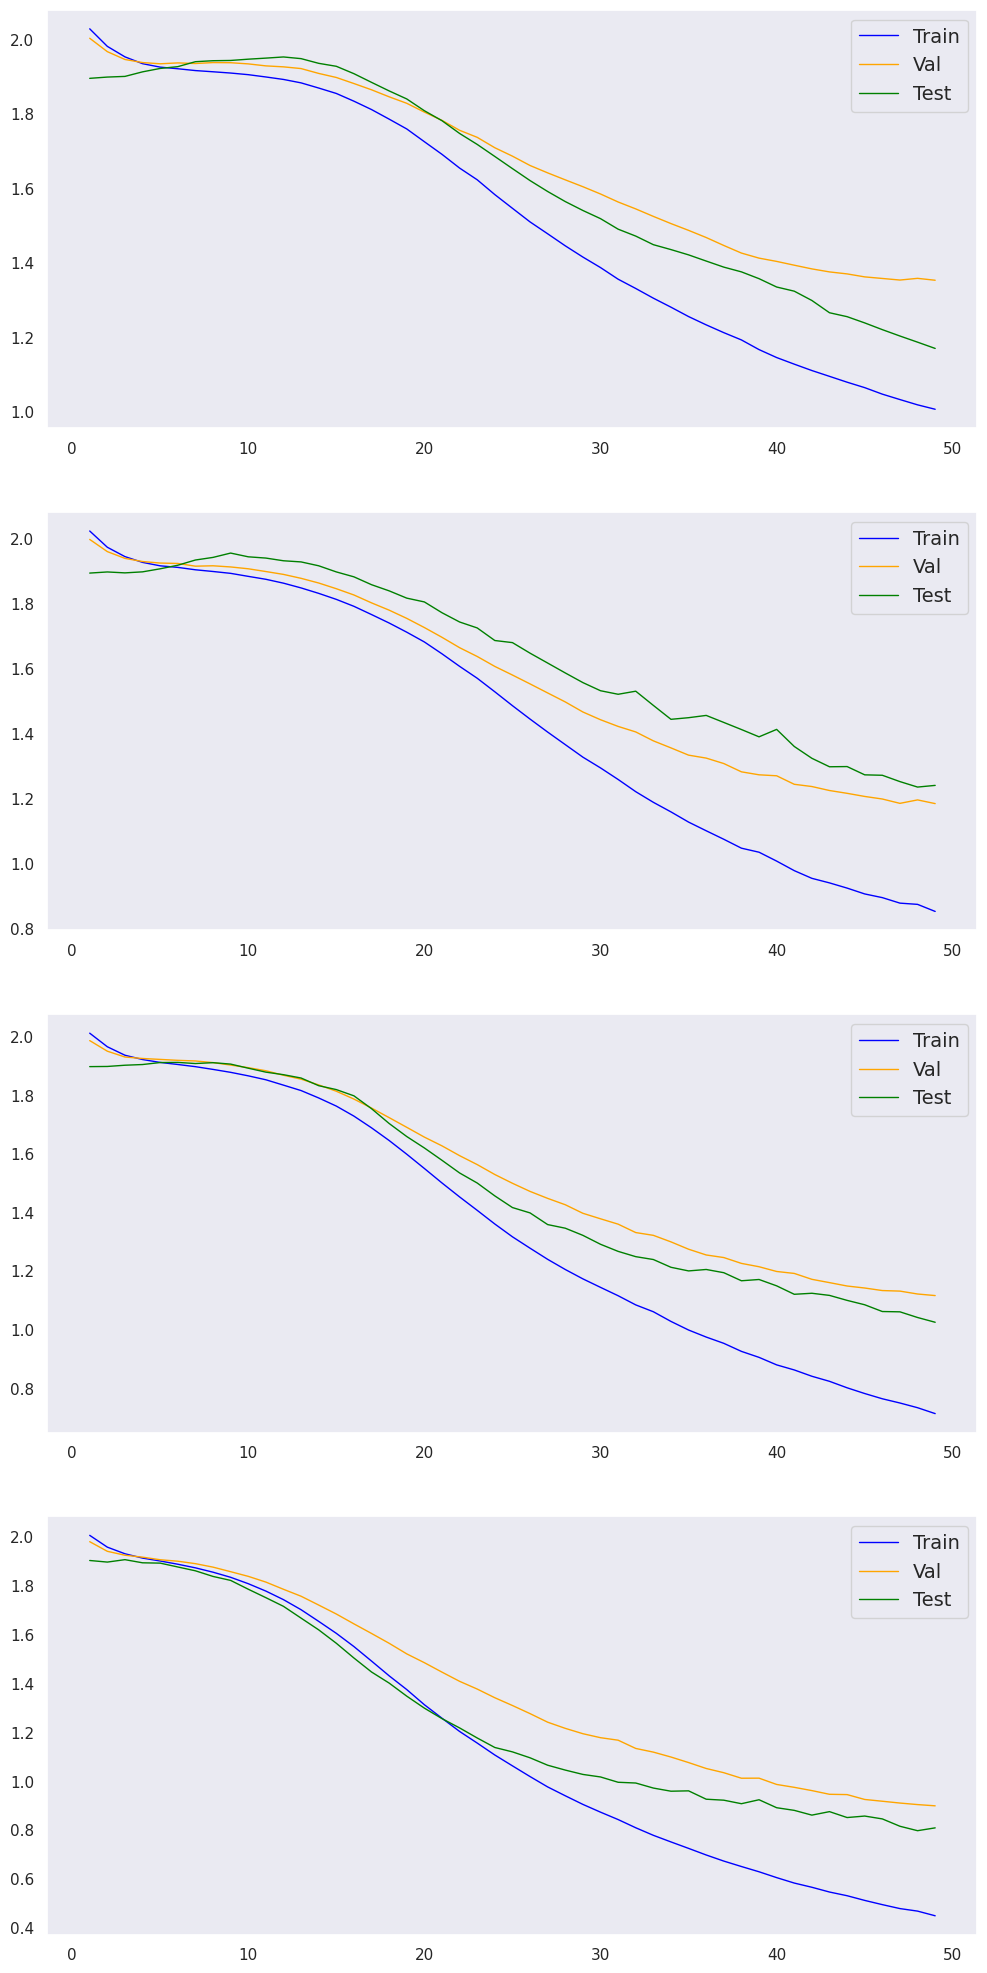

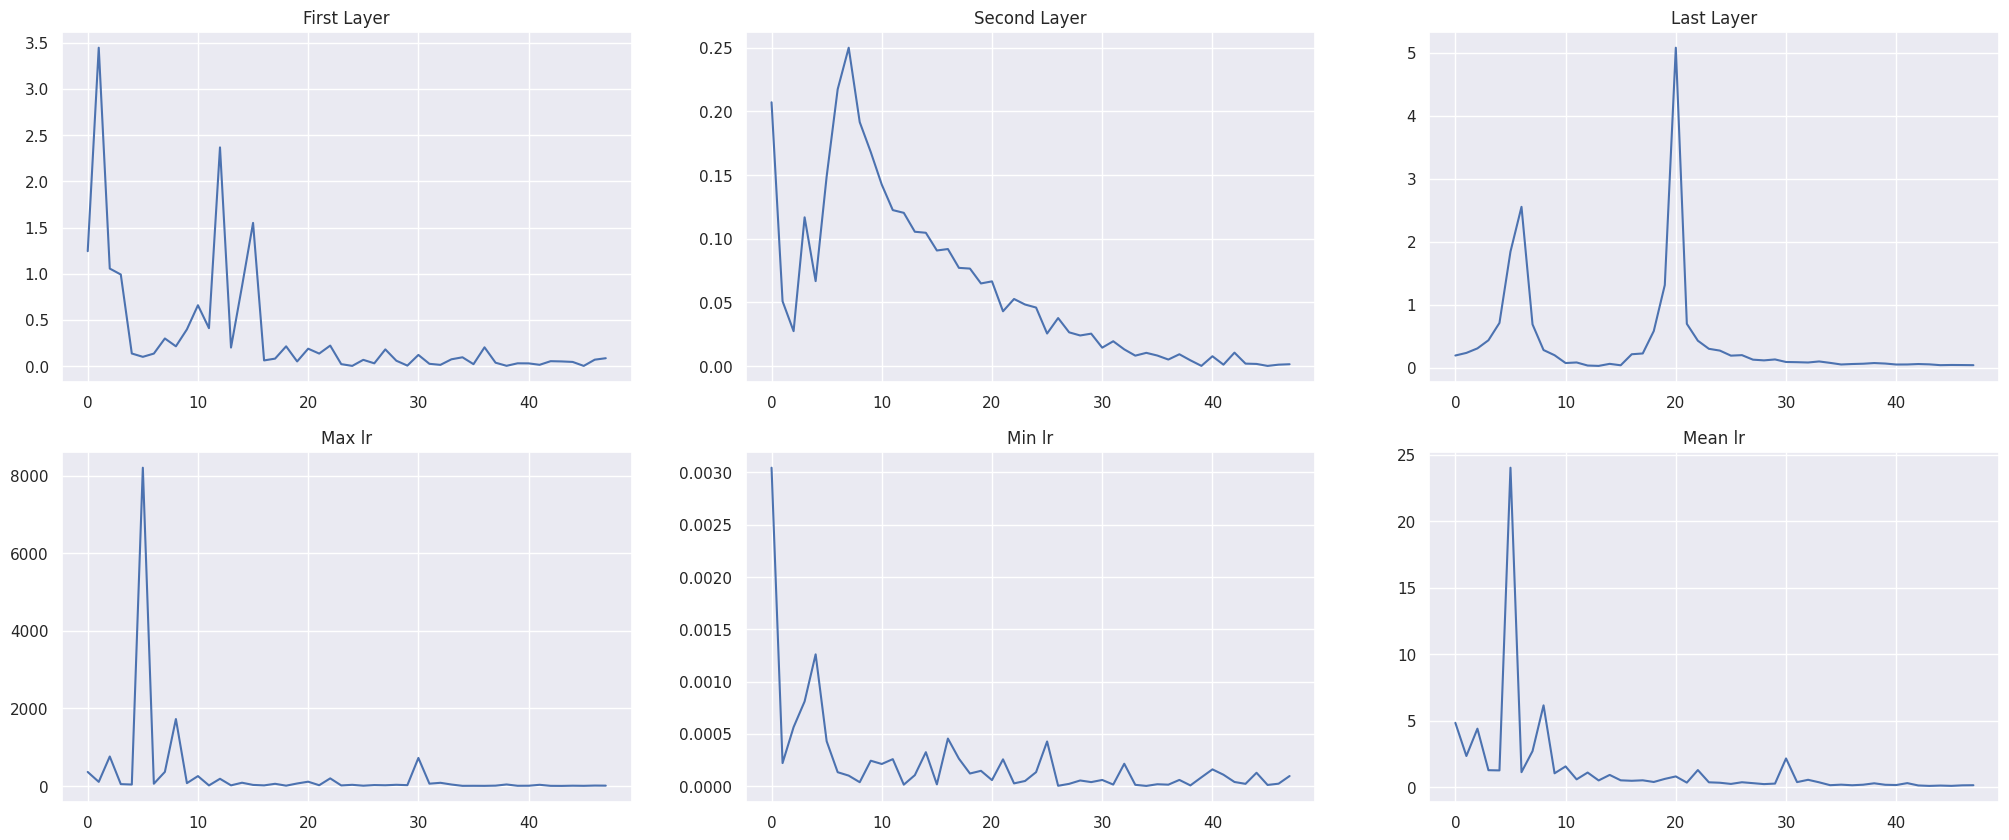

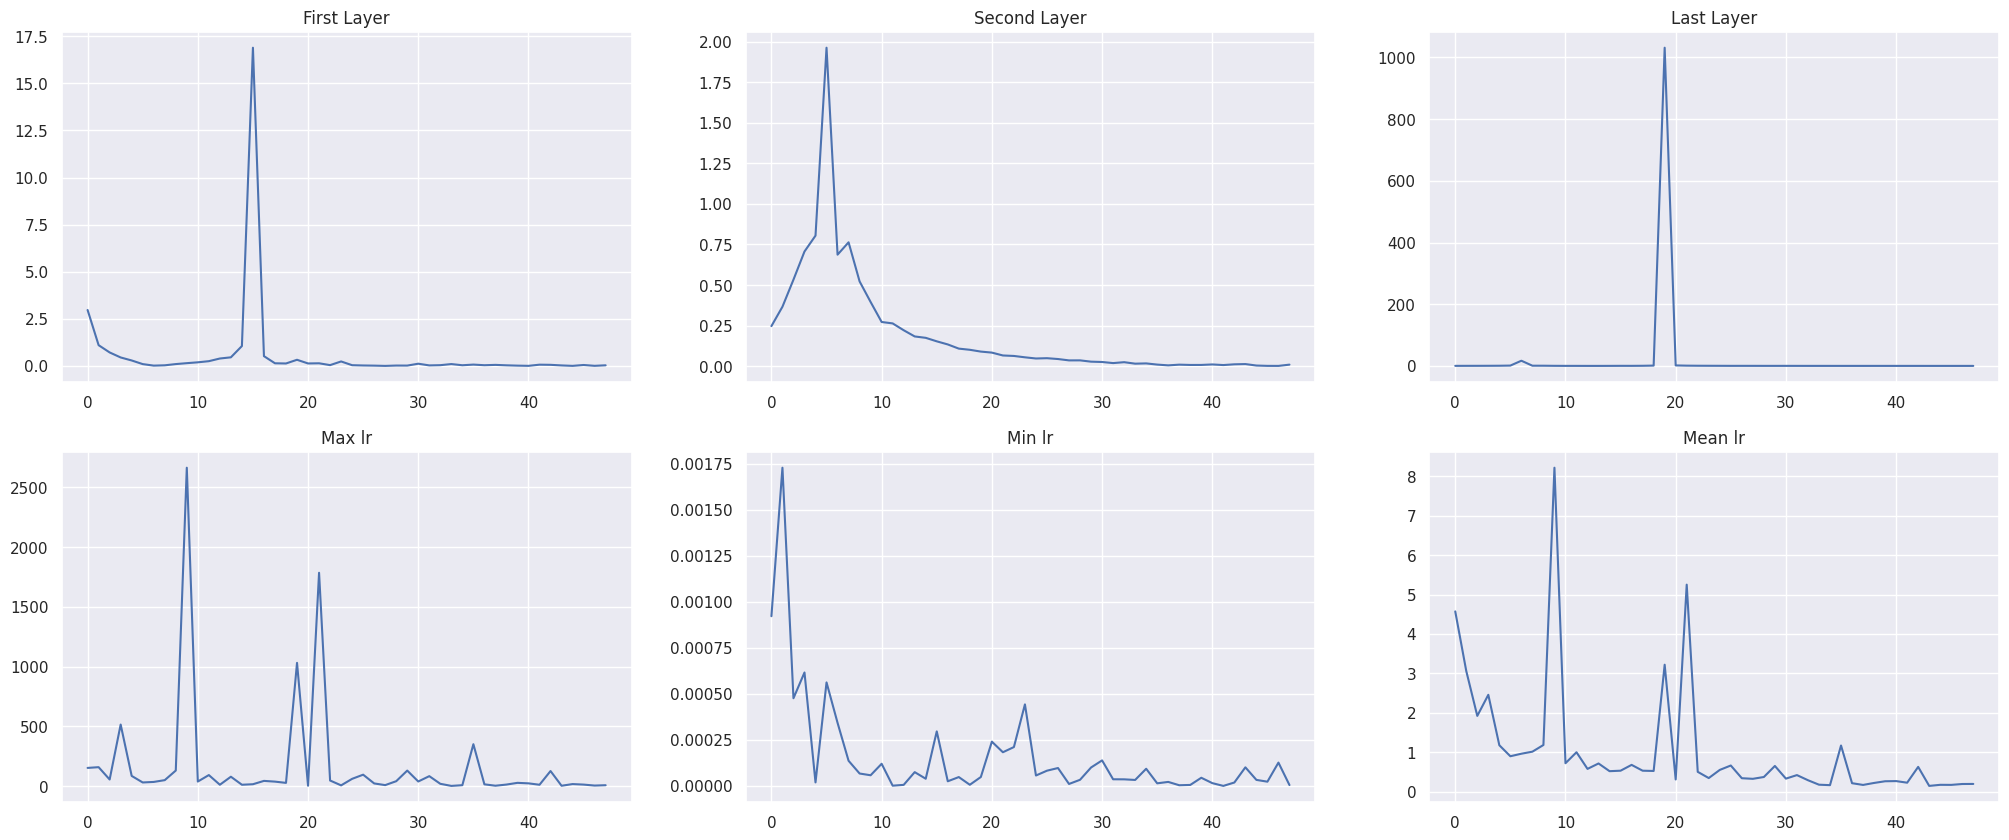

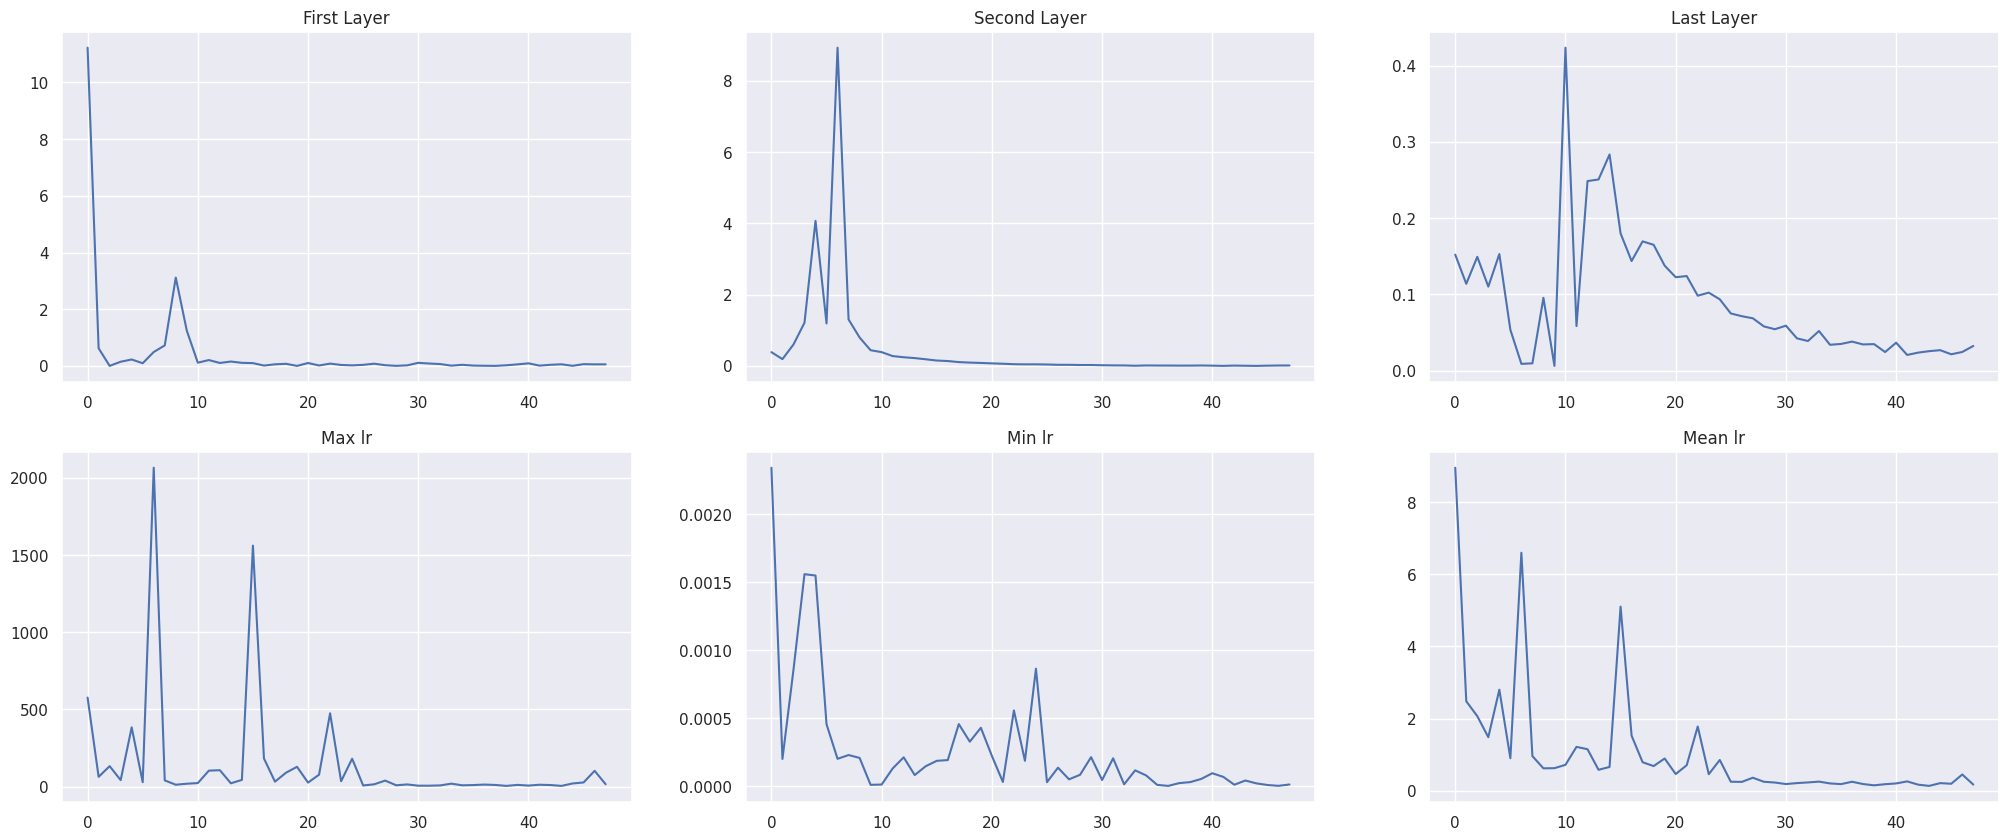

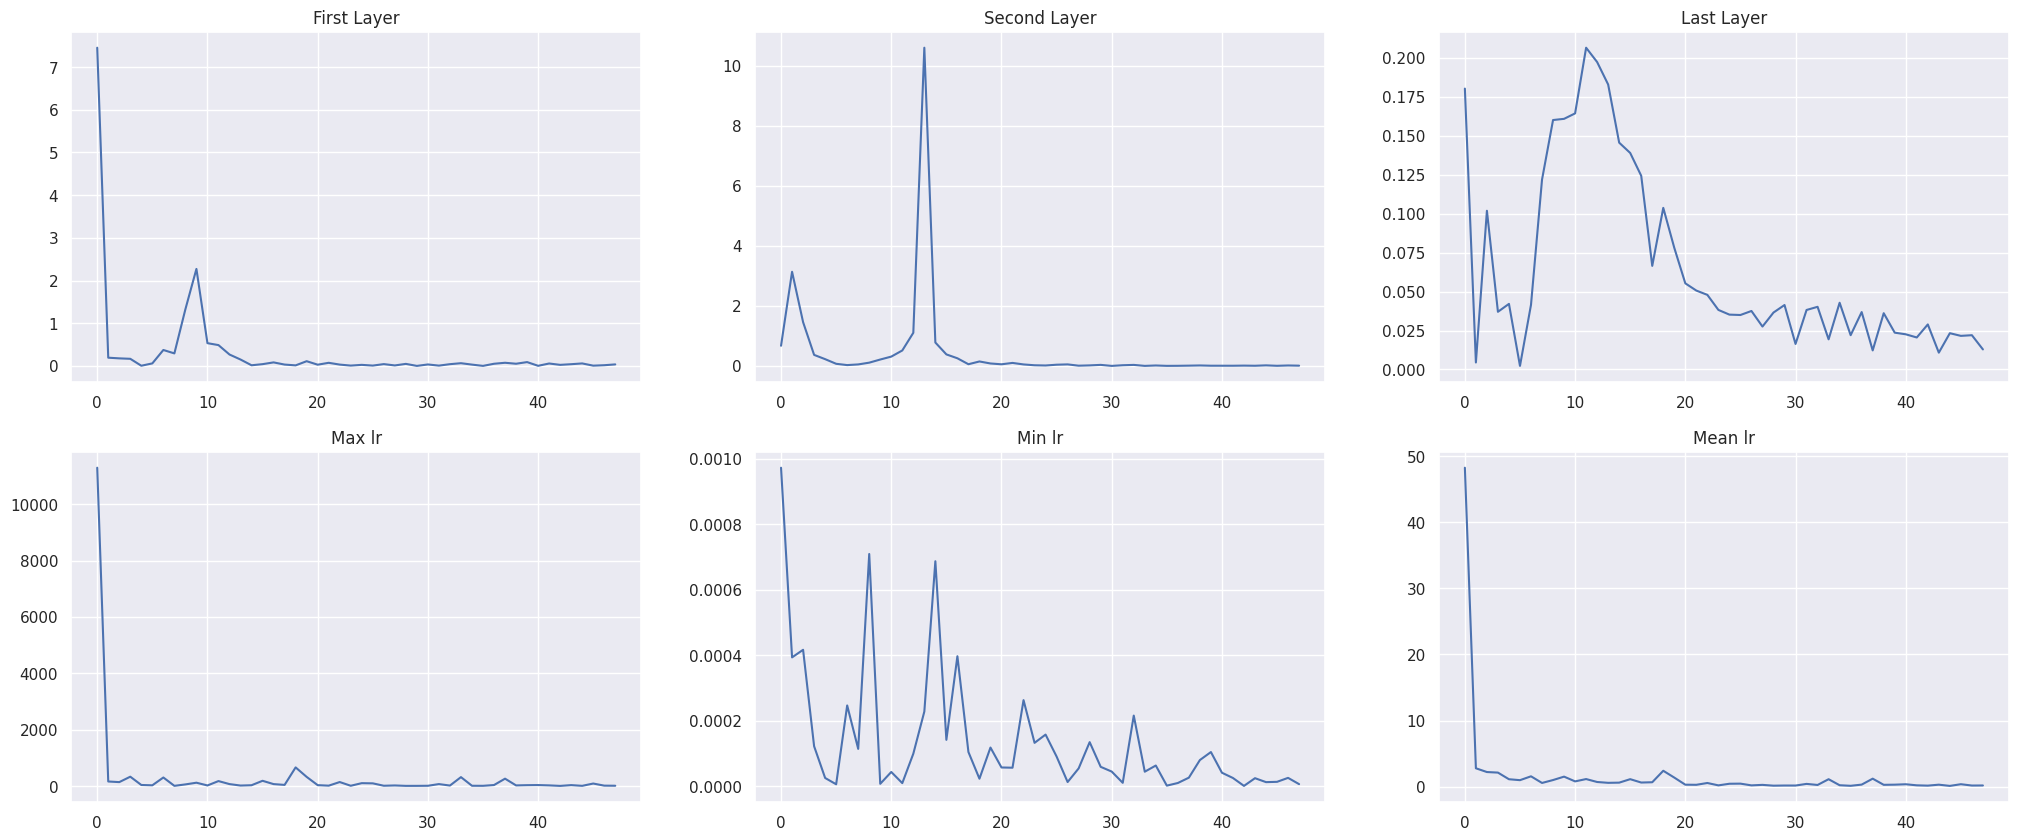

In [ ]:
fig18, ax18 = plt.subplots(len(betas), 1)
fig18.set_size_inches((12, 25))

for i in range(len(betas)):
  ax18[i].plot(errors_Adam[betas[i]]['Epoch'], np.array(errors_Adam[betas[i]]['Train'])[:, 0],      label='Train',      linewidth=1, color="blue")
  ax18[i].plot(errors_Adam[betas[i]]['Epoch'], np.array(errors_Adam[betas[i]]['Validation'])[:, 0], label='Val',        linewidth=1, color="orange")
  ax18[i].plot(errors_Adam[betas[i]]['Epoch'], np.array(errors_Adam[betas[i]]['Test'])[:, 0],       label='Test',       linewidth=1, color="green")
  ax18[i].legend(fontsize=14)
  ax18[i].grid()
  train_loss = np.array(errors_Adam[betas[i]]['Train'])[-1]
  test_loss = np.array(errors_Adam[betas[i]]['Test'])[-1]
  print(f'Train loss: \t{train_loss}')
  print(f'Test loss: \t{test_loss}\n')

for k in range(len(betas)):
    weightsChangesAdam = []

    for i in range(amountOfEpochs - 2):
        weightsChangesAdam.append([])
        for j in range(len(weightsHistoryAdam[betas[k]][i + 1])):
            weightsChangesAdam[-1].append(abs((weightsHistoryAdam[betas[k]][i + 1][j] - weightsHistoryAdam[betas[k]][i][j])/weightsHistoryAdam[betas[k]][i][j]))

    speed1 = []
    speed2 = []
    speed3 = []

    max_speed = []
    min_speed = []
    mean_speed = []

    for wc in weightsChangesAdam:
        speed1.append(wc[0][3][1])
        speed2.append(wc[2][1][2])
        speed3.append(wc[4][4][0])

        max_ = wc[0][0][0]
        min_ = wc[0][0][0]
        sum_ = 0

        for j in wc:
            h = np.asarray(j)

            if max_ < h.max():
                max_ = h.max()
            if min_ > h.min():
                min_ = h.min()

            sum_ += h.sum()

        max_speed.append(max_)
        min_speed.append(min_)
        mean_speed.append(sum_/362)

    fig19, ax19 = plt.subplots(2, 3)
    fig19.set_size_inches((25, 10))

    ax19[0][0].plot(speed1);
    ax19[0][0].title.set_text('First Layer')

    ax19[0][1].plot(speed2);
    ax19[0][1].title.set_text('Second Layer')

    ax19[0][2].plot(speed3);
    ax19[0][2].title.set_text('Last Layer')

    ax19[1][0].plot(max_speed);
    ax19[1][0].title.set_text('Max lr')

    ax19[1][1].plot(min_speed);
    ax19[1][1].title.set_text('Min lr')

    ax19[1][2].plot(mean_speed);
    ax19[1][2].title.set_text('Mean lr')

    plt.show()

RProp

In [ ]:
# Create a network
network = join(
    Input(n_components),
    Sigmoid(20),
    Sigmoid(20),
    Sigmoid(10),
    Softmax(7)
)

epochs = 300
# Compile the network
optimizer_Rprop = algorithms.RPROP(network,
                                step=0.01,
                                # minstep=1e-5,
                                error = 'categorical_crossentropy',
                                show_epoch = epochs//10,
                                verbose = True)
optimizer_Rprop.train(_data_train_x, train_y, _data_validation_x, validation_y, epochs = epochs)


Main information

[ALGORITHM] RPROP

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 30
[OPTION] shuffle_data = False
[OPTION] step = 0.01
[OPTION] train_end_signal = None
[OPTION] error = categorical_crossentropy
[OPTION] addons = None
[OPTION] decrease_factor = 0.5
[OPTION] increase_factor = 1.2
[OPTION] maxstep = 50
[OPTION] minstep = 0.1

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 3.24 seconds

Start training

[TRAINING DATA] shapes: (125, 10)
[TEST DATA] shapes: (62, 10)
[TRAINING] Total epochs: 300

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      2.1036 |      2.0815 |        1 ms |
|          30 |     0.51426 |     0.83649 |      906 μs |
|          60 |      0.4399 |      1.3221 |        8 ms |
|          90 |     0.32249 |     0.99178 |

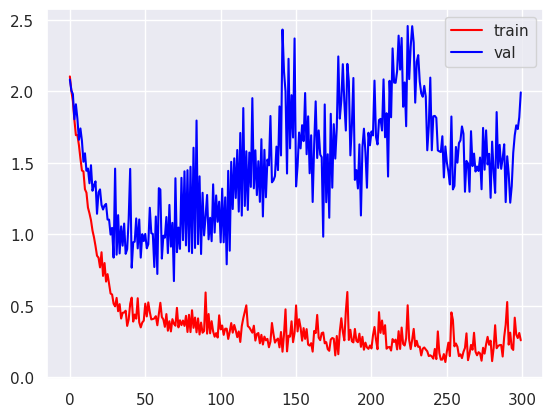

In [ ]:
plt.plot(optimizer_Rprop.train_errors, label="train", color="red")
plt.plot(optimizer_Rprop.validation_errors, label="val", color="blue")
plt.legend()
plt.show()

In [ ]:
test_y = encoder.transform(_data_test_y.reshape(-1, 1))

In [ ]:
print("Train error:", optimizer_Rprop.prediction_error(_data_train_x, train_y), "Test error:", optimizer_Rprop.prediction_error(_data_test_x, test_y))

Train error: 0.3043718656598099 Test error: 1.628434271845719
